# + IMPORTACION DE DATASET

In [48]:
from google.colab import files


print("Por favor, sube el archivo dataset_tesis.csv:")
uploaded_data = files.upload()


print("\nPor favor, sube el archivo indice_ipc.csv:")
uploaded_ipc = files.upload()


data_filename = list(uploaded_data.keys())[0]
ipc_filename = list(uploaded_ipc.keys())[0]

import pandas as pd


df_data = pd.read_csv(data_filename)
df_ipc = pd.read_csv(ipc_filename)


print("\nPrimeros registros de dataset_tesis.csv:")
print(df_data.head())

print("\nPrimeros registros de indice_ipc.csv:")
print(df_ipc.head())


Por favor, sube el archivo dataset_tesis.csv:


Saving dataset_tesis.csv to dataset_tesis (1).csv

Por favor, sube el archivo indice_ipc.csv:


Saving indice_ipc.csv to indice_ipc (1).csv

Primeros registros de dataset_tesis.csv:
   periodo  cliente_key   segmento_comercial marca_selecta marca_af  division_radicacion  indice_cross_sell  consumo_td  consumo_tc  saldo_promedio_vista  acreditacion_salarial
0  2023-10      8653355  PLAN SUELDO PRIVADO    No Selecta    No AF  AGD AGENCIA DIGITAL                  0    10116.34        0.00                   NaN                   0.00
1  2023-10       879512  PLAN SUELDO PRIVADO    No Selecta    No AF  AGD AGENCIA DIGITAL                  4        0.00    14860.40               3535.02                   0.00
2  2023-10      7834914  PLAN SUELDO PRIVADO    No Selecta    No AF  AGD AGENCIA DIGITAL                  2     5415.21        0.00              33649.41              187232.00
3  2023-12      4316578  PLAN SUELDO PRIVADO    No Selecta    No AF  AGD AGENCIA DIGITAL                  2        0.00   139256.26                  1.19                   0.00
4  2023-12      6180052      

In [50]:
display(df_data.head())

,periodo,cliente_key,segmento_comercial,marca_selecta,marca_af,division_radicacion,indice_cross_sell,consumo_td,consumo_tc,saldo_promedio_vista,acreditacion_salarial
0,2023-10,8653355,PLAN SUELDO PRIVADO,No Selecta,No AF,AGD AGENCIA DIGITAL,0,10116.34,0.00,NaN,0.00
1,2023-10,879512,PLAN SUELDO PRIVADO,No Selecta,No AF,AGD AGENCIA DIGITAL,4,0.00,14860.40,3535.02,0.00
2,2023-10,7834914,PLAN SUELDO PRIVADO,No Selecta,No AF,AGD AGENCIA DIGITAL,2,5415.21,0.00,33649.41,187232.00
3,2023-12,4316578,PLAN SUELDO PRIVADO,No Selecta,No AF,AGD AGENCIA DIGITAL,2,0.00,139256.26,1.19,0.00
4,2023-12,6180052,JUBILADOS,No Selecta,No AF,AGD AGENCIA DIGITAL,2,6944.73,0.00,41739.51,267091.80


In [51]:


try:
    df_ipc = pd.read_csv('indice_ipc.csv', sep=';')
    print("\nSuccessfully loaded indice_ipc.csv with ';' delimiter")
    print(df_ipc.head())
except FileNotFoundError:
    print("Error: indice_ipc.csv not found. Please ensure you have uploaded it.")


Successfully loaded indice_ipc.csv with ';' delimiter
   periodo     ipc  indice
0  2022-12 1134.59    1.00
1  2023-01 1202.98    0.94
2  2023-02 1282.71    0.88
3  2023-03 1381.16    0.82
4  2023-04 1497.21    0.76


In [52]:
display(df_ipc.head())

,periodo,ipc,indice
0,2022-12,1134.59,1.00
1,2023-01,1202.98,0.94
2,2023-02,1282.71,0.88
3,2023-03,1381.16,0.82
4,2023-04,1497.21,0.76


+ COMBINACION DE DATASETS PARA CREAR CAMPOS MONETARIOS DEFLACIONANDO A BASE 100 (DICIEMBRE-2022)

In [53]:



df_combined = pd.merge(df_data, df_ipc[['periodo', 'indice']], on='periodo', how='left')


columns_to_deflate = ['consumo_td', 'consumo_tc', 'saldo_promedio_vista', 'acreditacion_salarial']


for col in columns_to_deflate:
    new_col_name = f"{col}_ipc"

    df_combined['indice'] = pd.to_numeric(df_combined['indice'], errors='coerce')

    df_combined[new_col_name] = df_combined[col] * df_combined['indice']


print("\nCombined dataframe with new IPC adjusted columns:")
display(df_combined.head())


print("\nInfo of the combined dataframe:")
df_combined.info()


Combined dataframe with new IPC adjusted columns:


,periodo,cliente_key,segmento_comercial,marca_selecta,marca_af,division_radicacion,indice_cross_sell,consumo_td,consumo_tc,saldo_promedio_vista,acreditacion_salarial,indice,consumo_td_ipc,consumo_tc_ipc,saldo_promedio_vista_ipc,acreditacion_salarial_ipc
0,2023-10,8653355,PLAN SUELDO PRIVADO,No Selecta,No AF,AGD AGENCIA DIGITAL,0,10116.34,0.00,NaN,0.00,0.45,4598.01,0.00,NaN,0.00
1,2023-10,879512,PLAN SUELDO PRIVADO,No Selecta,No AF,AGD AGENCIA DIGITAL,4,0.00,14860.40,3535.02,0.00,0.45,0.00,6754.24,1606.71,0.00
2,2023-10,7834914,PLAN SUELDO PRIVADO,No Selecta,No AF,AGD AGENCIA DIGITAL,2,5415.21,0.00,33649.41,187232.00,0.45,2461.28,0.00,15294.08,85099.30
3,2023-12,4316578,PLAN SUELDO PRIVADO,No Selecta,No AF,AGD AGENCIA DIGITAL,2,0.00,139256.26,1.19,0.00,0.32,0.00,44718.32,0.38,0.00
4,2023-12,6180052,JUBILADOS,No Selecta,No AF,AGD AGENCIA DIGITAL,2,6944.73,0.00,41739.51,267091.80,0.32,2230.11,0.00,13403.50,85769.19



Info of the combined dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2790000 entries, 0 to 2789999
Data columns (total 16 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   periodo                    object 
 1   cliente_key                int64  
 2   segmento_comercial         object 
 3   marca_selecta              object 
 4   marca_af                   object 
 5   division_radicacion        object 
 6   indice_cross_sell          int64  
 7   consumo_td                 float64
 8   consumo_tc                 float64
 9   saldo_promedio_vista       float64
 10  acreditacion_salarial      float64
 11  indice                     float64
 12  consumo_td_ipc             float64
 13  consumo_tc_ipc             float64
 14  saldo_promedio_vista_ipc   float64
 15  acreditacion_salarial_ipc  float64
dtypes: float64(9), int64(2), object(5)
memory usage: 340.6+ MB


# + EDA

Mostramos las primeras filas del DataFrame, verificamos los tipos de datos de cada columna y obtenemos un resumen estadístico de las columnas numéricas.


In [54]:


pd.set_option('display.float_format', lambda x: '%.2f' % x)


pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)



print("First 5 rows of the DataFrame:")
display(df_combined.head())


print("\nData types of each column:")
df_combined.info()


print("\nDescriptive statistics for numerical columns:")
display(df_combined.describe())

First 5 rows of the DataFrame:


,periodo,cliente_key,segmento_comercial,marca_selecta,marca_af,division_radicacion,indice_cross_sell,consumo_td,consumo_tc,saldo_promedio_vista,acreditacion_salarial,indice,consumo_td_ipc,consumo_tc_ipc,saldo_promedio_vista_ipc,acreditacion_salarial_ipc
0,2023-10,8653355,PLAN SUELDO PRIVADO,No Selecta,No AF,AGD AGENCIA DIGITAL,0,10116.34,0.00,NaN,0.00,0.45,4598.01,0.00,NaN,0.00
1,2023-10,879512,PLAN SUELDO PRIVADO,No Selecta,No AF,AGD AGENCIA DIGITAL,4,0.00,14860.40,3535.02,0.00,0.45,0.00,6754.24,1606.71,0.00
2,2023-10,7834914,PLAN SUELDO PRIVADO,No Selecta,No AF,AGD AGENCIA DIGITAL,2,5415.21,0.00,33649.41,187232.00,0.45,2461.28,0.00,15294.08,85099.30
3,2023-12,4316578,PLAN SUELDO PRIVADO,No Selecta,No AF,AGD AGENCIA DIGITAL,2,0.00,139256.26,1.19,0.00,0.32,0.00,44718.32,0.38,0.00
4,2023-12,6180052,JUBILADOS,No Selecta,No AF,AGD AGENCIA DIGITAL,2,6944.73,0.00,41739.51,267091.80,0.32,2230.11,0.00,13403.50,85769.19



Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2790000 entries, 0 to 2789999
Data columns (total 16 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   periodo                    object 
 1   cliente_key                int64  
 2   segmento_comercial         object 
 3   marca_selecta              object 
 4   marca_af                   object 
 5   division_radicacion        object 
 6   indice_cross_sell          int64  
 7   consumo_td                 float64
 8   consumo_tc                 float64
 9   saldo_promedio_vista       float64
 10  acreditacion_salarial      float64
 11  indice                     float64
 12  consumo_td_ipc             float64
 13  consumo_tc_ipc             float64
 14  saldo_promedio_vista_ipc   float64
 15  acreditacion_salarial_ipc  float64
dtypes: float64(9), int64(2), object(5)
memory usage: 340.6+ MB

Descriptive statistics for numerical columns:


,cliente_key,indice_cross_sell,consumo_td,consumo_tc,saldo_promedio_vista,acreditacion_salarial,indice,consumo_td_ipc,consumo_tc_ipc,saldo_promedio_vista_ipc,acreditacion_salarial_ipc
count,2790000.00,2790000.00,2790000.00,2790000.00,2787189.00,2790000.00,2790000.00,2790000.00,2790000.00,2787189.00,2790000.00
mean,5438202.76,2.90,12671.60,116219.86,240999.77,544366.68,0.38,3032.77,26562.38,58487.92,129372.00
std,3535883.62,1.33,25274.96,301012.52,858031.75,844508.30,0.28,4906.17,57953.20,173933.42,150035.68
min,930.00,0.00,0.00,0.00,-11153.52,0.00,0.13,0.00,0.00,-1452.14,0.00
25%,1805761.00,2.00,0.00,0.00,14316.26,151290.73,0.15,0.00,0.00,4427.26,49990.64
50%,5964590.00,3.00,5494.33,5446.94,51209.67,318791.14,0.21,1897.71,1758.80,15007.04,99616.99
75%,9039197.50,4.00,15563.05,112620.22,173783.03,700310.65,0.62,3994.52,32652.60,48507.97,166905.37
max,10924006.00,9.00,2000000.00,21254042.56,113062399.04,351695588.00,1.00,271649.61,3071361.43,14720222.02,45789202.97


## Analisis de valores faltantes

Identificamos si hay valores faltantes en el DataFrame y visualizar su distribución.


In [55]:

missing_values = df_combined.isnull().sum()


print("Número de valores faltantes por columna:")
print(missing_values)



Número de valores faltantes por columna:
periodo                         0
cliente_key                     0
segmento_comercial              0
marca_selecta                   0
marca_af                        0
division_radicacion             0
indice_cross_sell               0
consumo_td                      0
consumo_tc                      0
saldo_promedio_vista         2811
acreditacion_salarial           0
indice                          0
consumo_td_ipc                  0
consumo_tc_ipc                  0
saldo_promedio_vista_ipc     2811
acreditacion_salarial_ipc       0
dtype: int64


In [56]:



missing_saldo_by_segment_period = df_combined.groupby(['segmento_comercial', 'periodo'])['saldo_promedio_vista'].apply(lambda x: x.isnull().sum()).unstack(fill_value=0)


print("\nCantidad de valores faltantes en 'saldo_promedio_vista' por 'segmento_comercial' y 'periodo':")
display(missing_saldo_by_segment_period)


Cantidad de valores faltantes en 'saldo_promedio_vista' por 'segmento_comercial' y 'periodo':


periodo,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12,2025-01,2025-02,2025-03,2025-04,2025-05,2025-06
segmento_comercial,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
JUBILADOS,85,82,79,78,76,71,68,54,47,41,41,34,33,29,25,22,22,22,22,19,17,14,13,7,5,4,4,1,1,0,0
PLAN SUELDO PRIVADO,94,92,88,87,84,80,76,72,66,59,54,54,52,52,51,49,47,43,42,38,37,34,27,14,13,11,5,4,1,1,1
PLAN SUELDO PUBLICO,33,30,29,23,23,22,21,18,18,16,16,15,11,11,9,9,9,8,7,6,6,5,4,4,4,3,3,3,1,0,0


In [57]:


import matplotlib.pyplot as plt

df_zeros_acreditacion = df_combined[df_combined['acreditacion_salarial'] == 0]


conteo_ceros_por_periodo_segmento = df_zeros_acreditacion.groupby(['periodo', 'segmento_comercial']).size().reset_index(name='cantidad_ceros_acreditacion')


print("Cantidad de valores igual a 0 para 'acreditacion_salarial' por periodo y segmento_comercial:")
display(conteo_ceros_por_periodo_segmento)


if len(conteo_ceros_por_periodo_segmento) < 50:
    plt.figure(figsize=(15, 8))
    sns.barplot(data=conteo_ceros_por_periodo_segmento, x='periodo', y='cantidad_ceros_acreditacion', hue='segmento_comercial')
    plt.title('Cantidad de valores 0 en acreditacion_salarial por Periodo y Segmento Comercial')
    plt.xlabel('Periodo')
    plt.ylabel('Cantidad de Ceros')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("\nDemasiados puntos de datos para mostrar un gráfico de barras claro. Consulta la tabla anterior.")

Cantidad de valores igual a 0 para 'acreditacion_salarial' por periodo y segmento_comercial:


,periodo,segmento_comercial,cantidad_ceros_acreditacion
0,2022-12,JUBILADOS,1126
1,2022-12,PLAN SUELDO PRIVADO,4663
2,2022-12,PLAN SUELDO PUBLICO,1570
3,2023-01,JUBILADOS,1066
4,2023-01,PLAN SUELDO PRIVADO,4392
...,...,...,...
88,2025-05,PLAN SUELDO PRIVADO,3167
89,2025-05,PLAN SUELDO PUBLICO,533
90,2025-06,JUBILADOS,29488
91,2025-06,PLAN SUELDO PRIVADO,3522



Demasiados puntos de datos para mostrar un gráfico de barras claro. Consulta la tabla anterior.


## Análisis la distribución de variables categóricas

Contamos la frecuencia de los valores únicos en las columnas categóricas.


In [58]:


import seaborn as sns


cliente_count_by_segment_period = df_combined.groupby(['periodo', 'segmento_comercial']).size().reset_index(name='numero_clientes')


pivot_cliente_count = cliente_count_by_segment_period.pivot(index='periodo', columns='segmento_comercial', values='numero_clientes').fillna(0)

print("\nCantidad de clientes por segmento comercial y periodo:")
display(pivot_cliente_count)





Cantidad de clientes por segmento comercial y periodo:


segmento_comercial,JUBILADOS,PLAN SUELDO PRIVADO,PLAN SUELDO PUBLICO
periodo,,,
2022-12,30000,30000,30000
2023-01,30000,30000,30000
2023-02,30000,30000,30000
2023-03,30000,30000,30000
2023-04,30000,30000,30000
2023-05,30000,30000,30000
2023-06,30000,30000,30000
2023-07,30000,30000,30000
2023-08,30000,30000,30000


In [59]:

categorical_cols = df_combined.select_dtypes(include=['object']).columns


for col in categorical_cols:
    print(f"\nFrequency counts for column: {col}")
    print(df_combined[col].value_counts())


Frequency counts for column: periodo
periodo
2023-10    90000
2023-12    90000
2024-08    90000
2024-09    90000
2024-10    90000
2022-12    90000
2023-01    90000
2024-01    90000
2024-02    90000
2024-11    90000
2024-12    90000
2024-03    90000
2024-05    90000
2023-02    90000
2023-03    90000
2023-04    90000
2023-05    90000
2025-01    90000
2025-02    90000
2024-06    90000
2024-07    90000
2025-04    90000
2025-05    90000
2023-06    90000
2023-07    90000
2023-08    90000
2023-09    90000
2023-11    90000
2024-04    90000
2025-03    90000
2025-06    90000
Name: count, dtype: int64

Frequency counts for column: segmento_comercial
segmento_comercial
PLAN SUELDO PRIVADO    930000
JUBILADOS              930000
PLAN SUELDO PUBLICO    930000
Name: count, dtype: int64

Frequency counts for column: marca_selecta
marca_selecta
No Selecta    2650656
Selecta        139344
Name: count, dtype: int64

Frequency counts for column: marca_af
marca_af
No AF    1967559
AF        822441
Name: c

Visualizacion de Graficos de Torta de las variables categóricas

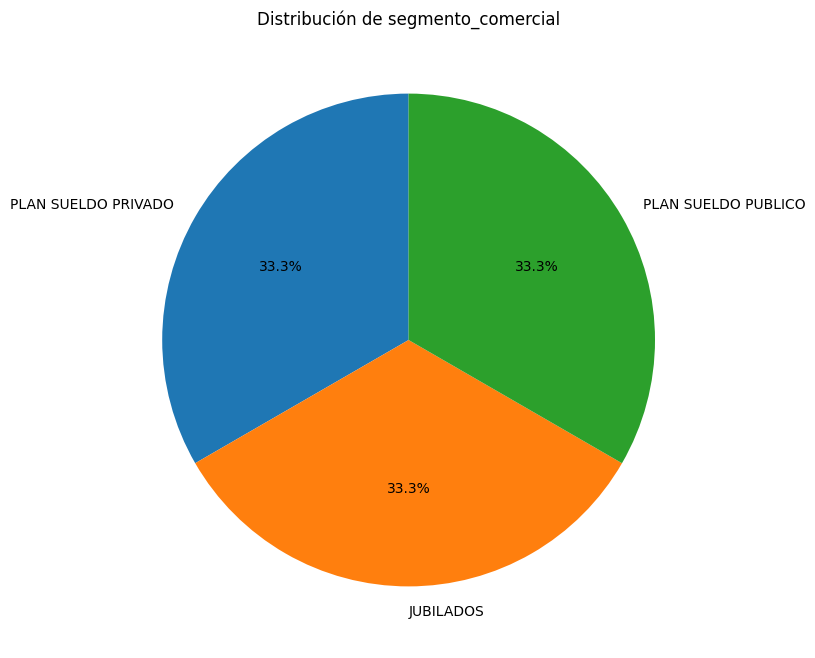

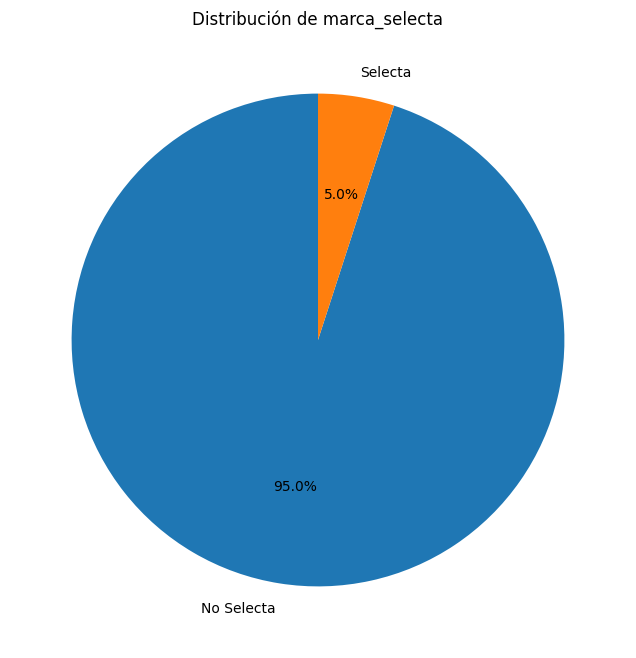

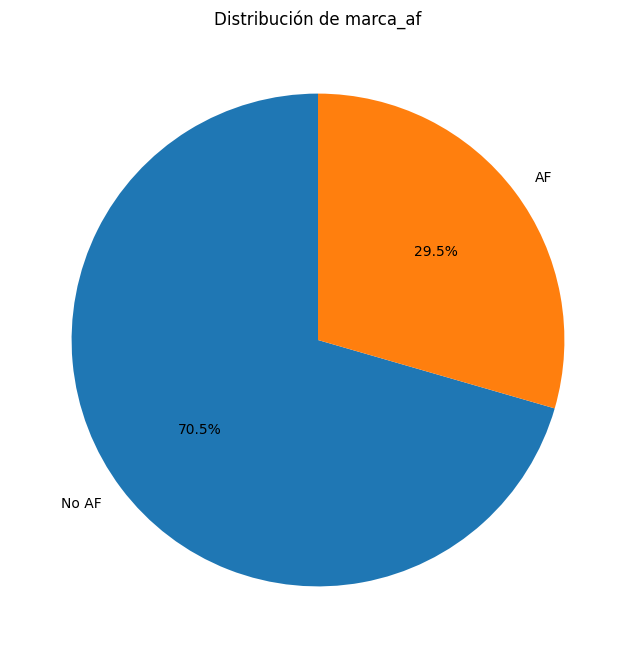

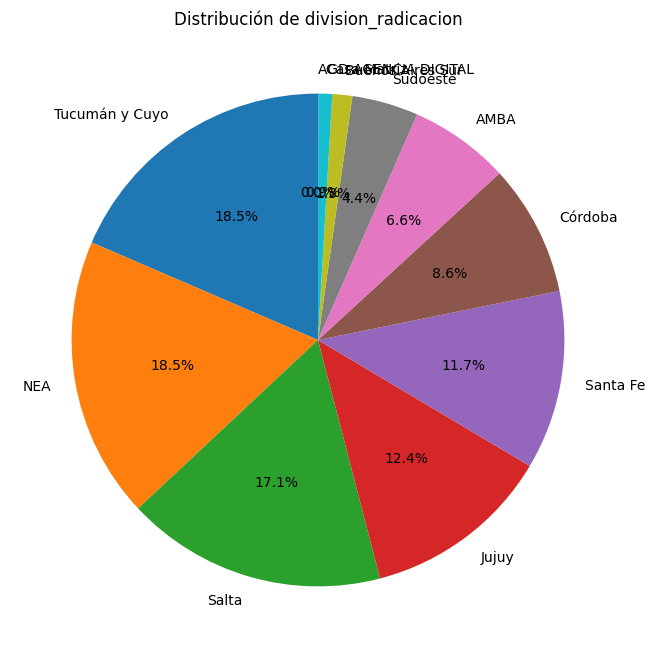

In [60]:


import matplotlib.pyplot as plt

categorical_cols_to_plot = [col for col in categorical_cols if col != 'periodo']


for col in categorical_cols_to_plot:
    plt.figure(figsize=(8, 8))
    df_combined[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribución de {col}')
    plt.ylabel('') #
    plt.show()

ELIMINO JUNIO-2025 POR FALTA DE DATOS ACTUALIZADOS

In [61]:

df_combined = df_combined[df_combined['periodo'] != '2025-06']


print("\nRegistros después de eliminar el periodo '2025-06':")
display(df_combined[df_combined['periodo'] == '2025-06'])


Registros después de eliminar el periodo '2025-06':


,periodo,cliente_key,segmento_comercial,marca_selecta,marca_af,division_radicacion,indice_cross_sell,consumo_td,consumo_tc,saldo_promedio_vista,acreditacion_salarial,indice,consumo_td_ipc,consumo_tc_ipc,saldo_promedio_vista_ipc,acreditacion_salarial_ipc


In [62]:



cliente_count_by_segment_marca = df_combined.groupby(['segmento_comercial', 'marca_selecta'])['cliente_key'].nunique().reset_index(name='conteo_clientes_unicos')


print("\nConteo único de cliente_key por segmento_comercial y marca_selecta:")
display(cliente_count_by_segment_marca)


Conteo único de cliente_key por segmento_comercial y marca_selecta:


,segmento_comercial,marca_selecta,conteo_clientes_unicos
0,JUBILADOS,No Selecta,29363
1,JUBILADOS,Selecta,803
2,PLAN SUELDO PRIVADO,No Selecta,27872
3,PLAN SUELDO PRIVADO,Selecta,3132
4,PLAN SUELDO PUBLICO,No Selecta,29135
5,PLAN SUELDO PUBLICO,Selecta,1330


In [63]:


descriptive_cols = ['indice_cross_sell', 'consumo_td_ipc', 'consumo_tc_ipc', 'saldo_promedio_vista_ipc', 'acreditacion_salarial_ipc']


descriptive_stats = df_combined.groupby(['segmento_comercial', 'marca_selecta'])[descriptive_cols].agg(['mean', 'std', 'min', lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75), 'max'])


descriptive_stats.rename(columns={'<lambda_0>': '25%', 'median': '50%', '<lambda_1>': '75%'}, inplace=True)



cliente_count = df_combined.groupby(['segmento_comercial', 'marca_selecta'])['cliente_key'].nunique().reset_index(name='unique_cliente_count')


descriptive_stats.columns = ['_'.join(map(str, col)).strip() for col in descriptive_stats.columns.values]
descriptive_stats = descriptive_stats.reset_index()


final_stats = pd.merge(descriptive_stats, cliente_count, on=['segmento_comercial', 'marca_selecta'], how='left')


print("\nEstadísticas descriptivas por Segmento Comercial y Marca Selecta:")
display(final_stats)


Estadísticas descriptivas por Segmento Comercial y Marca Selecta:


,segmento_comercial,marca_selecta,indice_cross_sell_mean,indice_cross_sell_std,indice_cross_sell_min,indice_cross_sell_25%,indice_cross_sell_50%,indice_cross_sell_75%,indice_cross_sell_max,consumo_td_ipc_mean,consumo_td_ipc_std,consumo_td_ipc_min,consumo_td_ipc_25%,consumo_td_ipc_50%,consumo_td_ipc_75%,consumo_td_ipc_max,consumo_tc_ipc_mean,consumo_tc_ipc_std,consumo_tc_ipc_min,consumo_tc_ipc_25%,consumo_tc_ipc_50%,consumo_tc_ipc_75%,consumo_tc_ipc_max,saldo_promedio_vista_ipc_mean,saldo_promedio_vista_ipc_std,saldo_promedio_vista_ipc_min,saldo_promedio_vista_ipc_25%,saldo_promedio_vista_ipc_50%,saldo_promedio_vista_ipc_75%,saldo_promedio_vista_ipc_max,acreditacion_salarial_ipc_mean,acreditacion_salarial_ipc_std,acreditacion_salarial_ipc_min,acreditacion_salarial_ipc_25%,acreditacion_salarial_ipc_50%,acreditacion_salarial_ipc_75%,acreditacion_salarial_ipc_max,unique_cliente_count
0,JUBILADOS,No Selecta,2.64,1.27,0,2.00,3.00,4.00,8,2463.12,4315.24,0.00,0.00,1101.51,3304.78,203737.21,8525.23,22287.65,0.00,0.00,0.00,7078.66,2294877.32,44896.80,140538.53,0.00,3038.50,8784.91,32479.71,8537169.59,78721.41,76132.11,0.00,42207.60,53757.69,84085.85,7790180.73,29363
1,JUBILADOS,Selecta,4.02,1.37,0,3.00,4.00,5.00,8,4356.30,5958.98,0.00,1541.55,3174.70,5430.93,187217.03,78727.84,123062.27,0.00,6494.08,41414.94,100722.46,2472927.37,245959.52,500256.00,0.00,49329.82,117975.41,262685.34,13609207.11,215545.21,226966.16,0.00,76043.06,185186.08,282800.36,10099938.46,803
2,PLAN SUELDO PRIVADO,No Selecta,2.79,1.33,0,2.00,3.00,4.00,9,3260.69,4855.61,0.00,497.74,2242.30,4144.80,194633.52,28197.07,46477.27,0.00,0.00,7041.47,40435.29,1364032.71,60977.96,160760.86,0.00,5129.73,18411.06,54376.10,12727146.87,138884.89,133455.26,0.00,64973.67,123913.55,183713.33,20483006.24,27872
3,PLAN SUELDO PRIVADO,Selecta,3.92,1.14,0,3.00,4.00,5.00,8,4056.93,6039.24,0.00,1194.92,2968.43,5114.33,271649.61,138329.80,169567.73,0.00,38337.72,89449.26,175655.41,3071361.43,173208.18,406085.72,-1452.14,23235.72,67348.23,171065.96,14720222.02,351744.98,507490.13,0.00,148275.50,266461.68,425376.25,45789202.97,3132
4,PLAN SUELDO PUBLICO,No Selecta,3.11,1.31,0,2.00,3.00,4.00,8,3216.44,5195.87,0.00,0.00,2035.36,4223.93,233930.51,27066.58,42257.86,0.00,0.00,8769.48,40036.38,1297471.54,49114.35,137122.20,0.00,5509.15,15881.69,44047.85,9978361.75,140892.35,92211.97,0.00,84819.73,121899.51,178943.35,3405418.95,29135
5,PLAN SUELDO PUBLICO,Selecta,4.08,1.19,0,3.00,4.00,5.00,9,4657.60,5769.81,0.00,1992.71,3606.77,5762.69,217356.95,144821.88,161476.90,0.00,47559.76,101479.24,189696.88,2994485.65,197233.32,383668.46,0.00,34605.73,84545.67,199245.75,8208343.87,420001.59,270279.52,0.00,244921.16,357235.05,522815.95,4497988.05,1330


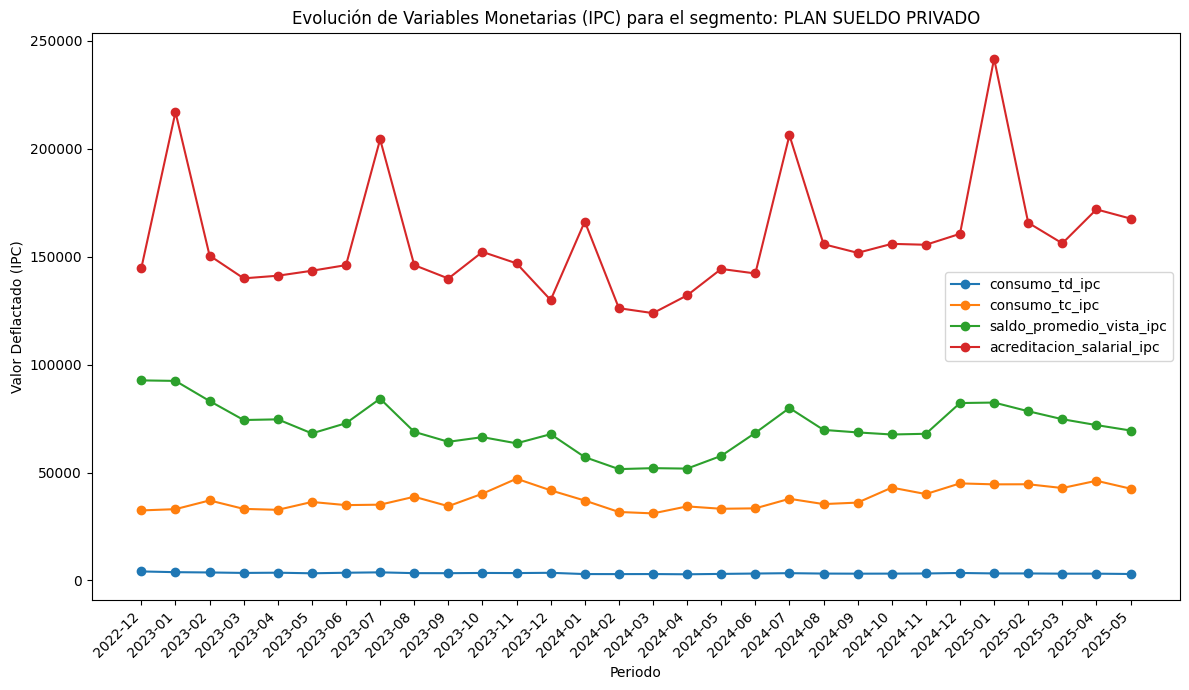

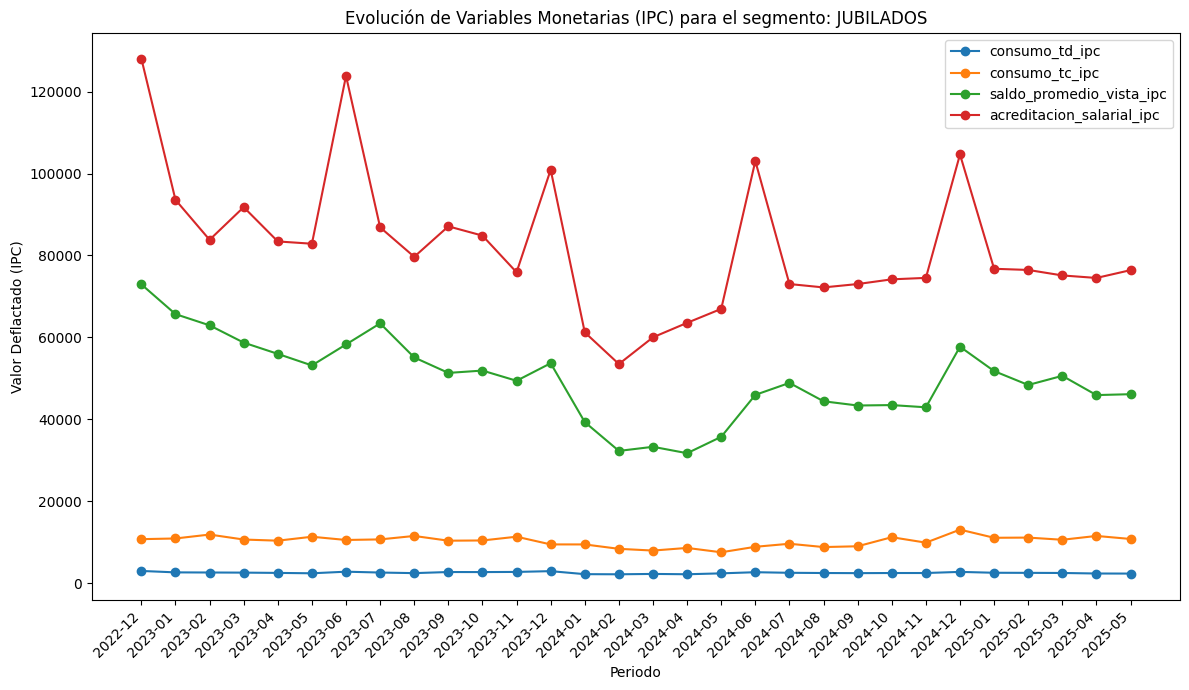

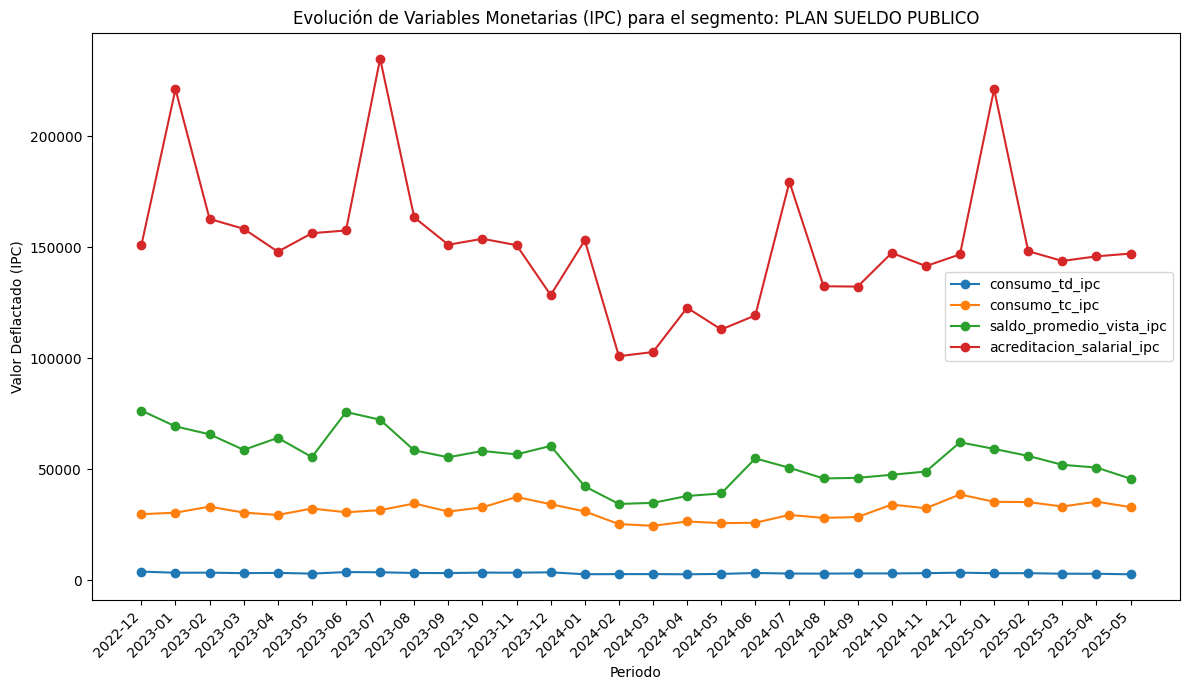

In [64]:


variables_numericas_ipc = ['consumo_td_ipc', 'consumo_tc_ipc', 'saldo_promedio_vista_ipc', 'acreditacion_salarial_ipc']


segmentos = df_combined['segmento_comercial'].unique()


for segmento in segmentos:

    df_segmento = df_combined[df_combined['segmento_comercial'] == segmento]


    df_segmento = df_segmento.sort_values(by='periodo')


    plt.figure(figsize=(12, 7))
    plt.title(f'Evolución de Variables Monetarias (IPC) para el segmento: {segmento}')
    plt.xlabel('Periodo')
    plt.ylabel('Valor Deflactado (IPC)')


    for var in variables_numericas_ipc:

        df_segmento_agg = df_segmento.groupby('periodo')[var].mean().reset_index()
        plt.plot(df_segmento_agg['periodo'], df_segmento_agg[var], marker='o', linestyle='-', label=var)



    plt.legend()


    plt.xticks(rotation=45, ha='right')


    plt.tight_layout()


    plt.show()

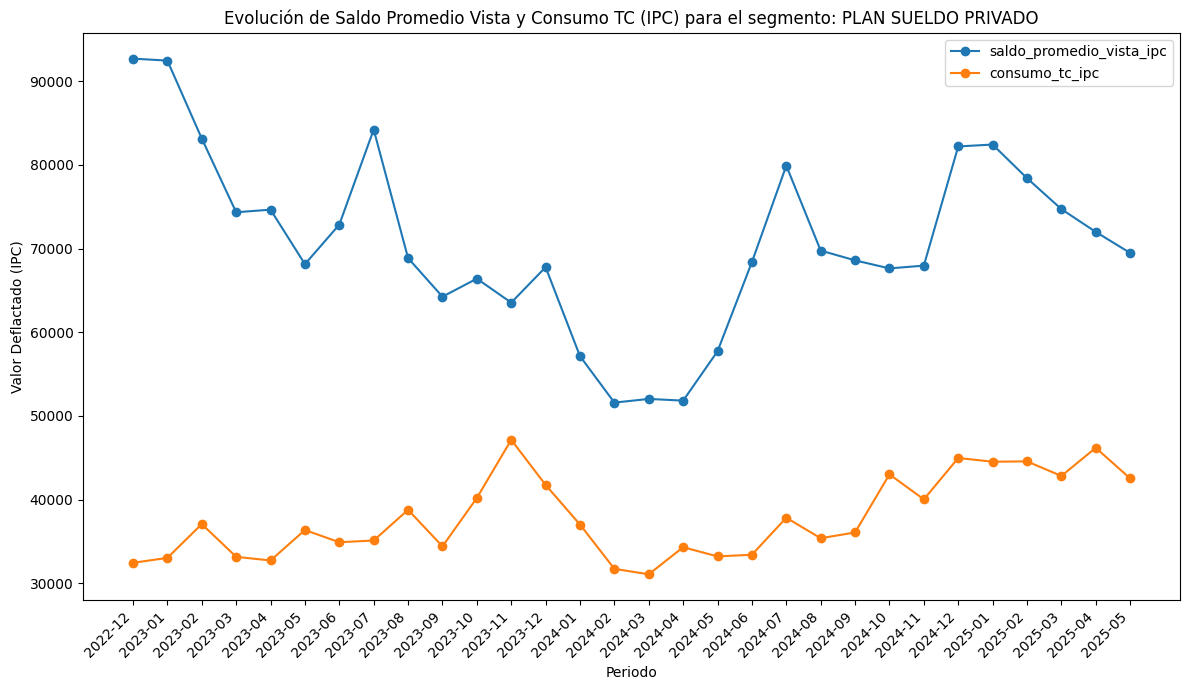

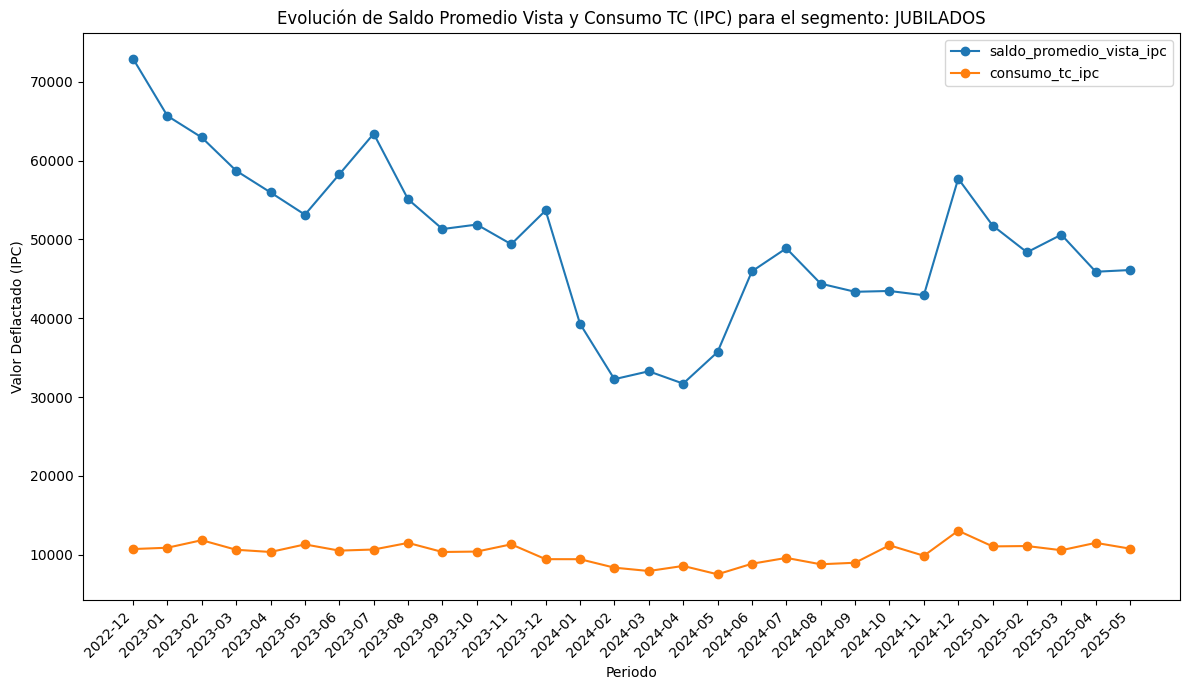

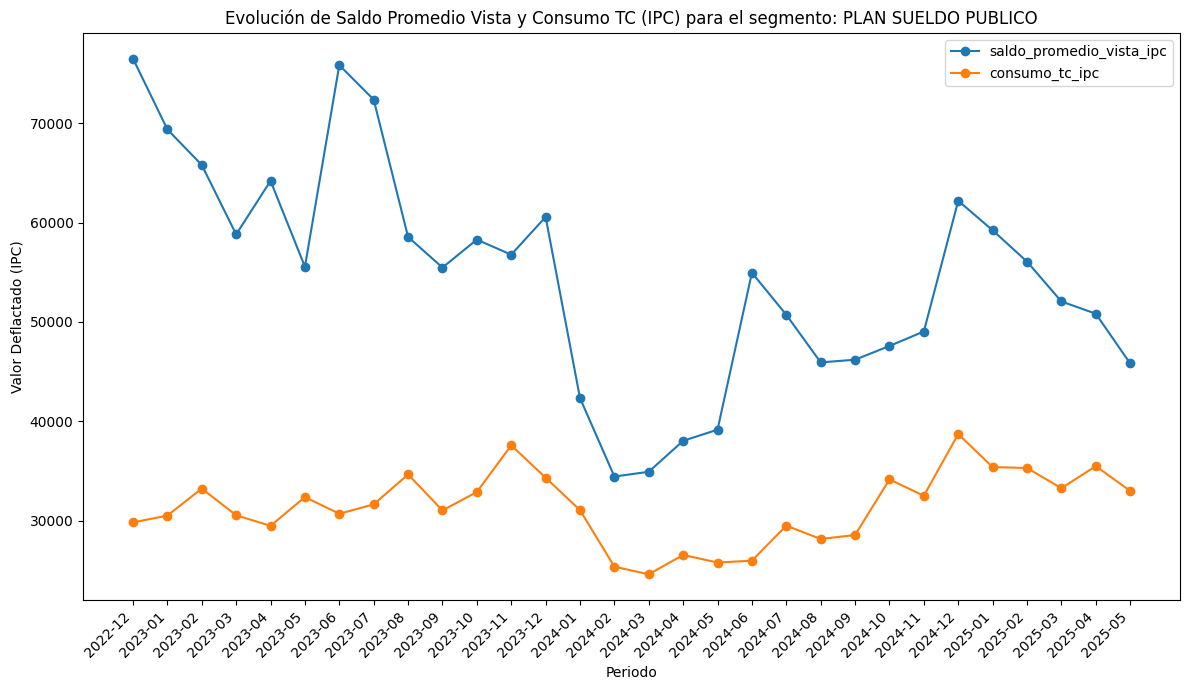

In [65]:

variables_numericas_seleccionadas_ipc = ['saldo_promedio_vista_ipc', 'consumo_tc_ipc']


segmentos = df_combined['segmento_comercial'].unique()


for segmento in segmentos:

    df_segmento = df_combined[df_combined['segmento_comercial'] == segmento]


    df_segmento = df_segmento.sort_values(by='periodo')


    plt.figure(figsize=(12, 7))
    plt.title(f'Evolución de Saldo Promedio Vista y Consumo TC (IPC) para el segmento: {segmento}')
    plt.xlabel('Periodo')
    plt.ylabel('Valor Deflactado (IPC)')


    for var in variables_numericas_seleccionadas_ipc:

        df_segmento_agg = df_segmento.groupby('periodo')[var].mean().reset_index()
        plt.plot(df_segmento_agg['periodo'], df_segmento_agg[var], marker='o', linestyle='-', label=var)


    plt.legend()


    plt.xticks(rotation=45, ha='right')


    plt.tight_layout()


    plt.show()

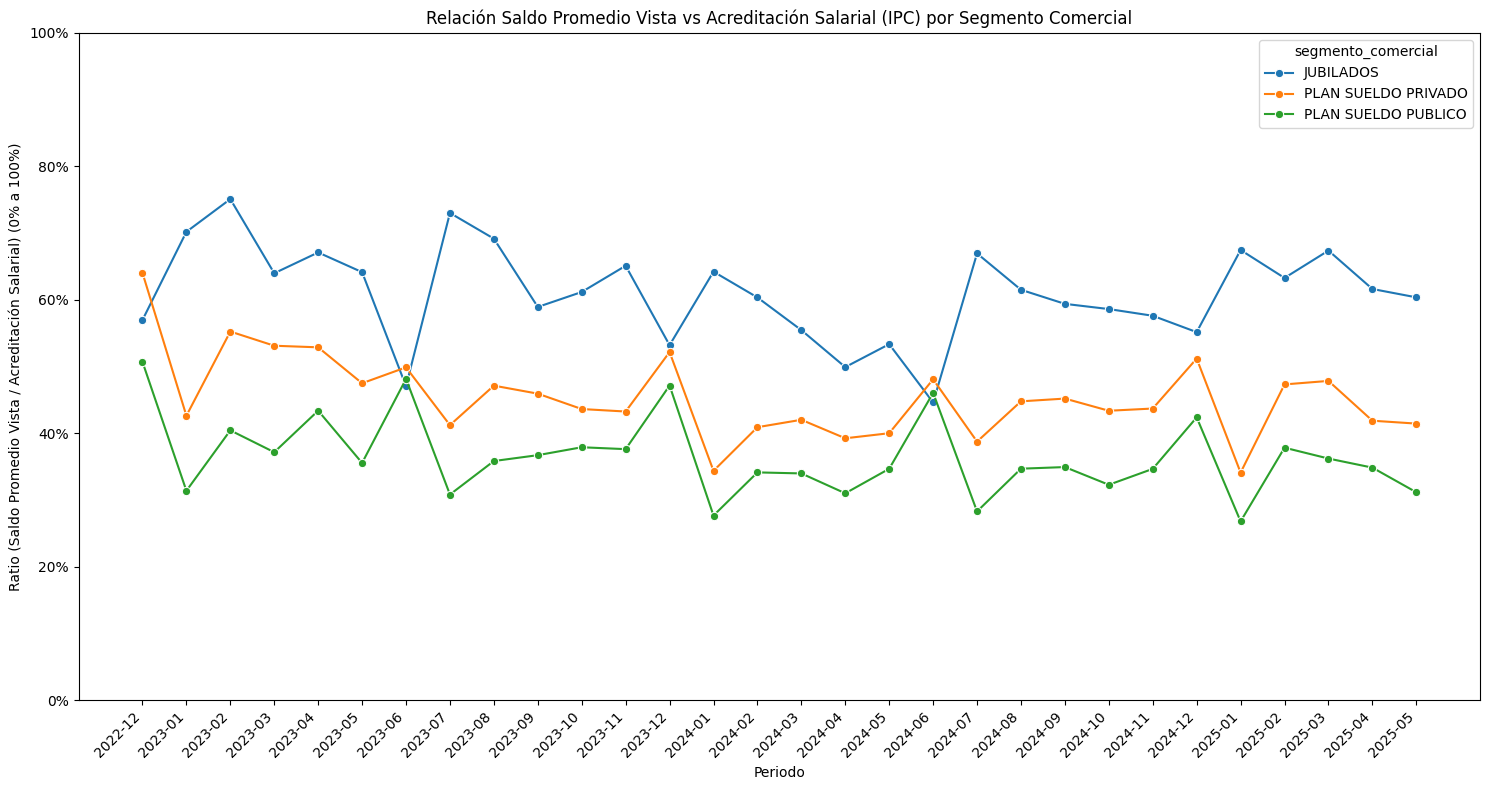

In [66]:


df_agg_ratio = df_combined.groupby(['periodo', 'segmento_comercial'])[['saldo_promedio_vista_ipc', 'acreditacion_salarial_ipc']].mean().reset_index()


df_agg_ratio['ratio_saldo_acreditacion'] = df_agg_ratio['saldo_promedio_vista_ipc'] / df_agg_ratio['acreditacion_salarial_ipc']
df_agg_ratio['ratio_saldo_acreditacion'] = df_agg_ratio['ratio_saldo_acreditacion'].replace([float('inf'), float('-inf')], 0)
df_agg_ratio['ratio_saldo_acreditacion'] = df_agg_ratio['ratio_saldo_acreditacion'].fillna(0)


df_agg_ratio['ratio_saldo_acreditacion'] = df_agg_ratio['ratio_saldo_acreditacion'].clip(upper=1.0)


df_agg_ratio = df_agg_ratio.sort_values(by='periodo')


plt.figure(figsize=(15, 8))
sns.lineplot(data=df_agg_ratio, x='periodo', y='ratio_saldo_acreditacion', hue='segmento_comercial', marker='o')


plt.title('Relación Saldo Promedio Vista vs Acreditación Salarial (IPC) por Segmento Comercial')
plt.xlabel('Periodo')
plt.ylabel('Ratio (Saldo Promedio Vista / Acreditación Salarial) (0% a 100%)')


plt.ylim(0, 1)


plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))


plt.xticks(rotation=45, ha='right')


plt.tight_layout()


plt.show()

# + SEGMENTACION: QUINTILES POR ACREDITACION SALARIAL


In [67]:


pd.set_option('display.float_format', lambda x: '%.2f' % x)


pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)



df_combined['quintil_acreditacion'] = df_combined.groupby(['segmento_comercial', 'periodo'])['acreditacion_salarial_ipc'].transform(
    lambda x: pd.qcut(x, 5, labels=False, duplicates='drop') + 1
)


quintile_distribution = df_combined.pivot_table(
    index=['segmento_comercial', 'periodo'],
    columns='quintil_acreditacion',
    values='acreditacion_salarial_ipc',
    aggfunc='count',
    fill_value=0
)

print("Distribución de Quintiles de acreditacion_salarial_ipc por Segmento Comercial y Periodo:")
display(quintile_distribution)


quintile_stats = df_combined.groupby(['segmento_comercial', 'periodo', 'quintil_acreditacion'])['acreditacion_salarial_ipc'].agg(['count', 'mean', 'median', 'min', 'max'])

print("\nEstadísticas de acreditacion_salarial_ipc por Quintil, Segmento Comercial y Periodo:")
display(quintile_stats)

Distribución de Quintiles de acreditacion_salarial_ipc por Segmento Comercial y Periodo:


quintil_acreditacion            1     2     3     4     5
segmento_comercial  periodo                              
JUBILADOS           2022-12  6214  5786  6000  6000  6000
                    2023-01  6258  5742  6039  5961  6000
                    2023-02  6289  5711  6000  6000  6000
                    2023-03  6369  5631  6000  6000  6000
                    2023-04  6446  5554  6112  5888  6000
...                           ...   ...   ...   ...   ...
PLAN SUELDO PUBLICO 2025-01  6000  6000  6000  6000  6000
                    2025-02  6000  6000  6000  6000  6000
                    2025-03  6000  6000  6000  6000  6000
                    2025-04  6001  5999  6000  6000  6000
                    2025-05  6000  6000  6000  6000  6000

[90 rows x 5 columns]


Estadísticas de acreditacion_salarial_ipc por Quintil, Segmento Comercial y Periodo:


count      mean    median       min        max
segmento_comercial  periodo quintil_acreditacion                                                
JUBILADOS           2022-12 1                      6214  47091.66  58783.40      0.00   61051.56
                            2                      5786  74750.78  75821.85  61105.58   82122.88
                            3                      6000  86259.83  83915.29  82122.99   93581.72
                            4                      6000 130407.33 133161.57  93582.75  166511.95
                            5                      6000 302823.81 259923.95 166517.34 3935129.32
...                                                 ...       ...       ...       ...        ...
PLAN SUELDO PUBLICO 2025-05 1                      6000  54343.46  62732.62      0.00   84818.38
                            2                      6000  94047.98  93279.12  84821.70  105819.86
                            3                      6000 123660.50 123215.66 105822.33  142801.48
                            4                      6000 166693.95 165536.72 142809.37  195556.12
                            5                      6000 297081.92 248851.81 195608.94 2320791.87

[450 rows x 5 columns]

In [20]:
display(df_combined.head())

,periodo,cliente_key,segmento_comercial,marca_selecta,marca_af,division_radicacion,indice_cross_sell,consumo_td,consumo_tc,saldo_promedio_vista,acreditacion_salarial,indice,consumo_td_ipc,consumo_tc_ipc,saldo_promedio_vista_ipc,acreditacion_salarial_ipc,quintil_acreditacion
0,2023-10,8653355,PLAN SUELDO PRIVADO,No Selecta,No AF,AGD AGENCIA DIGITAL,0,10116.34,0.00,NaN,0.00,0.45,4598.01,0.00,NaN,0.00,1
1,2023-10,879512,PLAN SUELDO PRIVADO,No Selecta,No AF,AGD AGENCIA DIGITAL,4,0.00,14860.40,3535.02,0.00,0.45,0.00,6754.24,1606.71,0.00,1
2,2023-10,7834914,PLAN SUELDO PRIVADO,No Selecta,No AF,AGD AGENCIA DIGITAL,2,5415.21,0.00,33649.41,187232.00,0.45,2461.28,0.00,15294.08,85099.30,2
3,2023-12,4316578,PLAN SUELDO PRIVADO,No Selecta,No AF,AGD AGENCIA DIGITAL,2,0.00,139256.26,1.19,0.00,0.32,0.00,44718.32,0.38,0.00,1
4,2023-12,6180052,JUBILADOS,No Selecta,No AF,AGD AGENCIA DIGITAL,2,6944.73,0.00,41739.51,267091.80,0.32,2230.11,0.00,13403.50,85769.19,4


# + CORRELACIONES

Cuadro de correlación entre consumo_tc_ipc y saldo_promedio_vista_ipc por segmento_comercial y quintil_acreditacion:


correlacion_consumo_saldo
segmento_comercial  quintil_acreditacion                           
JUBILADOS           1                                          0.13
                    2                                          0.03
                    3                                          0.12
                    4                                          0.04
                    5                                         -0.01
PLAN SUELDO PRIVADO 1                                          0.07
                    2                                          0.00
                    3                                         -0.07
                    4                                         -0.08
                    5                                         -0.01
PLAN SUELDO PUBLICO 1                                          0.03
                    2                                         -0.08
                    3                                         -0.10
                    4                                         -0.11
                    5                                         -0.02

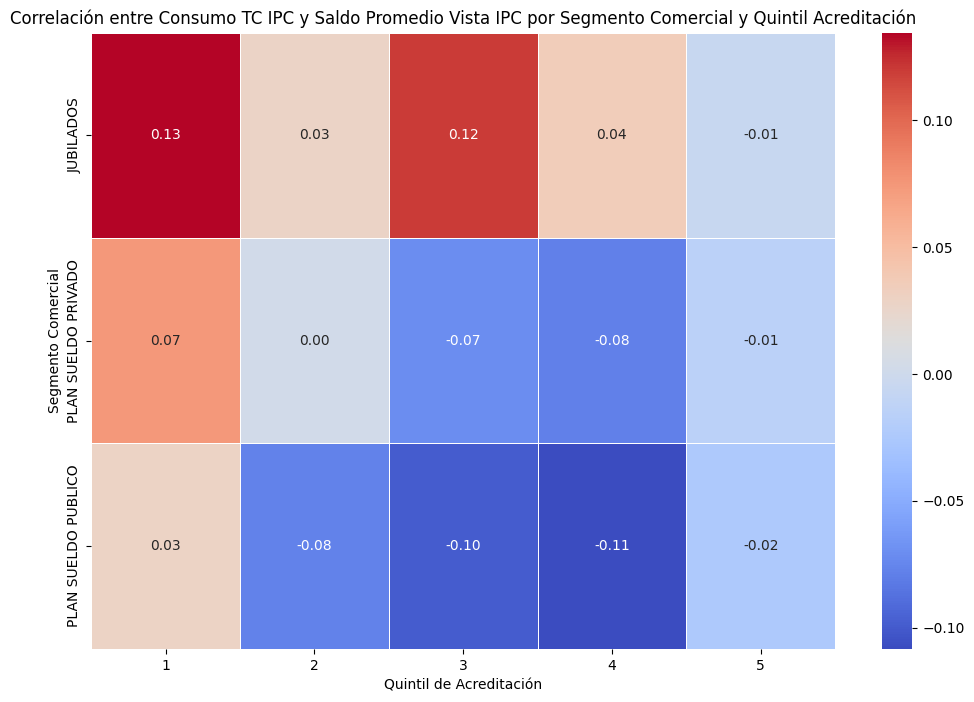

In [68]:


correlation_matrix = df_combined.groupby(['segmento_comercial', 'quintil_acreditacion'])[['consumo_tc_ipc', 'saldo_promedio_vista_ipc']].corr().unstack().iloc[:, [1]] # Get the correlation between the two columns


correlation_matrix.columns = ['correlacion_consumo_saldo']


print("Cuadro de correlación entre consumo_tc_ipc y saldo_promedio_vista_ipc por segmento_comercial y quintil_acreditacion:")
display(correlation_matrix)


correlation_matrix_reset = correlation_matrix.reset_index()


heatmap_data = correlation_matrix_reset.pivot_table(
    index='segmento_comercial',
    columns='quintil_acreditacion',
    values='correlacion_consumo_saldo'
)


plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlación entre Consumo TC IPC y Saldo Promedio Vista IPC por Segmento Comercial y Quintil Acreditación')
plt.xlabel('Quintil de Acreditación')
plt.ylabel('Segmento Comercial')
plt.show()


**La correlación directa entre consumo_tc_ipc y saldo_promedio_vista_ipc es muy débil en todos los segmentos y quintiles**

Un saldo a la vista es muy volátil y no necesariamente refleja el comportamiento de gasto con la tarjeta de crédito, posibles razones son:

Múltiples Cuentas: Un cliente puede pagar su tarjeta de crédito desde otra cuenta bancaria.

Flujo de Dinero: El saldo a la vista se ve afectado por muchos otros factores: transferencias, inversiones, pago de otros servicios, débitos automáticos, etc.

Comportamiento de Pago: Los clientes pueden ser "totaleros" (pagan todo el resumen a fin de mes, lo que causa una gran baja de saldo puntual) o pagar el mínimo, lo que no impactaría el saldo de la misma forma.

Cuadro de correlación entre saldo_promedio_vista_ipc y otras variables por segmento_comercial y quintil_acreditacion:


Correlacion_Saldo_vs_consumo_td  Correlacion_Saldo_vs_consumo_tc  Correlacion_Saldo_vs_acreditacion_salarial
segmento_comercial  quintil_acreditacion                                                                                                              
JUBILADOS           1                                                0.14                             0.13                                       -0.21
                    2                                                0.13                             0.03                                        0.04
                    3                                                0.17                             0.12                                        0.04
                    4                                                0.13                             0.04                                        0.09
                    5                                                0.11                            -0.01                                        0.27
PLAN SUELDO PRIVADO 1                                                0.14                             0.07                                       -0.05
                    2                                                0.10                             0.00                                        0.04
                    3                                                0.08                            -0.07                                        0.04
                    4                                                0.08                            -0.08                                        0.07
                    5                                                0.09                            -0.01                                        0.24
PLAN SUELDO PUBLICO 1                                                0.13                             0.03                                       -0.01
                    2                                                0.08                            -0.08                                        0.06
                    3                                                0.08                            -0.10                                        0.07
                    4                                                0.08                            -0.11                                        0.08
                    5                                                0.09                            -0.02                                        0.28


Cuadro de correlación consolidado:


Segmento_Quintil,JUBILADOS - Q1,JUBILADOS - Q2,JUBILADOS - Q3,JUBILADOS - Q4,JUBILADOS - Q5,PLAN SUELDO PRIVADO - Q1,PLAN SUELDO PRIVADO - Q2,PLAN SUELDO PRIVADO - Q3,PLAN SUELDO PRIVADO - Q4,PLAN SUELDO PRIVADO - Q5,PLAN SUELDO PUBLICO - Q1,PLAN SUELDO PUBLICO - Q2,PLAN SUELDO PUBLICO - Q3,PLAN SUELDO PUBLICO - Q4,PLAN SUELDO PUBLICO - Q5
Variable,,,,,,,,,,,,,,,
acreditacion_salarial,-0.21,0.04,0.04,0.09,0.27,-0.05,0.04,0.04,0.07,0.24,-0.01,0.06,0.07,0.08,0.28
consumo_tc,0.13,0.03,0.12,0.04,-0.01,0.07,0.00,-0.07,-0.08,-0.01,0.03,-0.08,-0.10,-0.11,-0.02
consumo_td,0.14,0.13,0.17,0.13,0.11,0.14,0.10,0.08,0.08,0.09,0.13,0.08,0.08,0.08,0.09


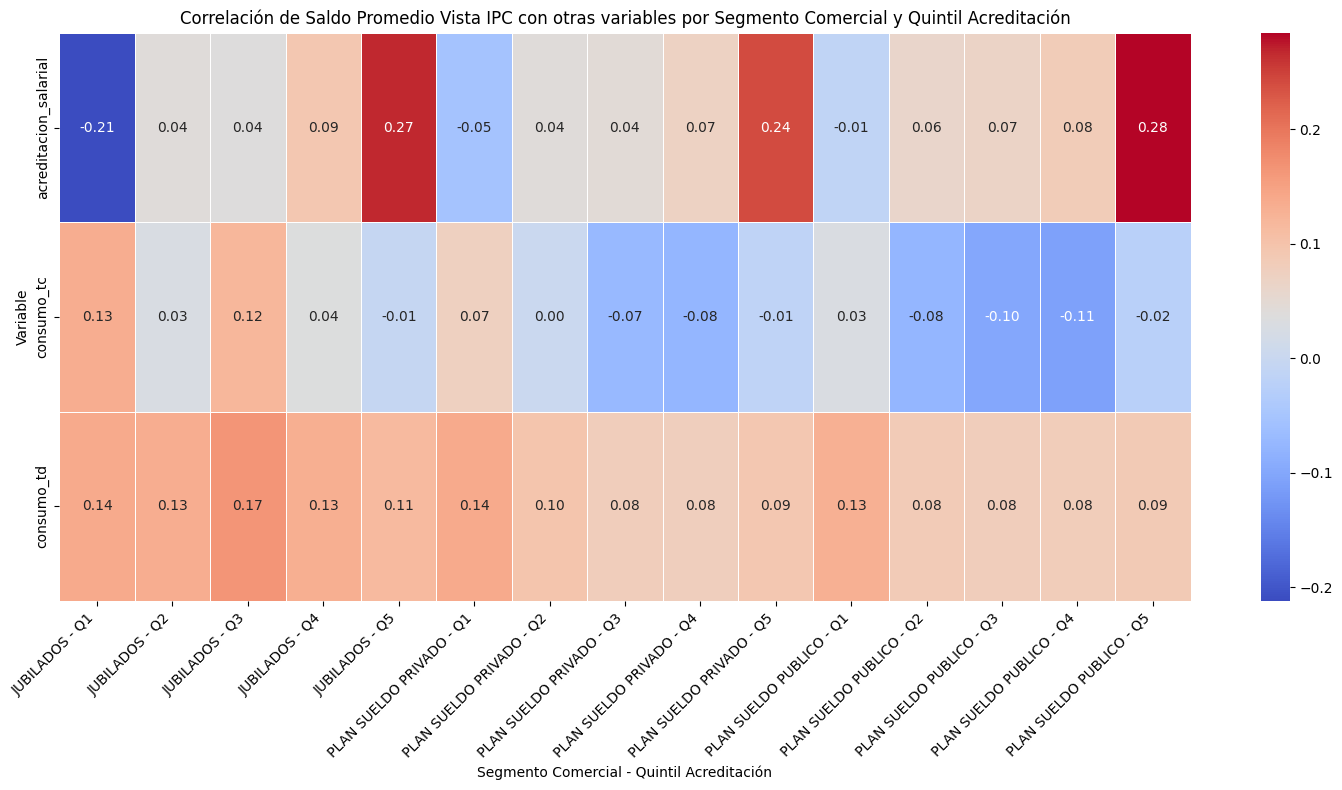

In [69]:


variables_to_correlate = ['consumo_td_ipc', 'consumo_tc_ipc', 'acreditacion_salarial_ipc']


correlation_results = {}


for var in variables_to_correlate:

    corr_group = df_combined.groupby(['segmento_comercial', 'quintil_acreditacion'])[
        ['saldo_promedio_vista_ipc', var]
    ].corr().unstack().iloc[:, 1]


    correlation_results[var] = corr_group


correlation_df = pd.DataFrame(correlation_results)


correlation_df.columns = [f'Correlacion_Saldo_vs_{var.replace("_ipc", "")}' for var in variables_to_correlate]


print("Cuadro de correlación entre saldo_promedio_vista_ipc y otras variables por segmento_comercial y quintil_acreditacion:")
display(correlation_df)



correlation_df_reset = correlation_df.reset_index()


correlation_df_melted = correlation_df_reset.melt(
    id_vars=['segmento_comercial', 'quintil_acreditacion'],
    value_vars=correlation_df.columns,
    var_name='Variable',
    value_name='Correlacion'
)


correlation_df_melted['Segmento_Quintil'] = correlation_df_melted['segmento_comercial'] + ' - Q' + correlation_df_melted['quintil_acreditacion'].astype(str)



final_correlation_table = correlation_df_melted.pivot_table(
    index='Variable',
    columns='Segmento_Quintil',
    values='Correlacion'
)


final_correlation_table.index = final_correlation_table.index.str.replace('Correlacion_Saldo_vs_', '')


print("\nCuadro de correlación consolidado:")
display(final_correlation_table)

#
plt.figure(figsize=(15, 8))
sns.heatmap(final_correlation_table, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlación de Saldo Promedio Vista IPC con otras variables por Segmento Comercial y Quintil Acreditación')
plt.xlabel('Segmento Comercial - Quintil Acreditación')
plt.ylabel('Variable')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Se puede observar una correlacion positiva creciente entre Acreditación_Salarial y Saldo_promedio_vista, a medida que aumenta el Quintil de Acreditación.**

Cuadro de correlación entre indice_cross_sell y variables de consumo/acreditación por segmento_comercial y quintil_acreditacion:


Correlacion_CrossSell_vs_consumo_td  Correlacion_CrossSell_vs_consumo_tc  Correlacion_CrossSell_vs_acreditacion_salarial
segmento_comercial  quintil_acreditacion                                                                                                                          
JUBILADOS           1                                                   -0.01                                 0.23                                            0.08
                    2                                                   -0.04                                 0.30                                            0.01
                    3                                                   -0.00                                 0.24                                            0.00
                    4                                                   -0.02                                 0.29                                            0.00
                    5                                                    0.02                                 0.32                                            0.12
PLAN SUELDO PRIVADO 1                                                    0.07                                 0.36                                           -0.02
                    2                                                   -0.01                                 0.39                                            0.10
                    3                                                   -0.03                                 0.35                                            0.04
                    4                                                   -0.02                                 0.31                                            0.03
                    5                                                    0.00                                 0.26                                            0.07
PLAN SUELDO PUBLICO 1                                                   -0.00                                 0.40                                            0.24
                    2                                                   -0.04                                 0.40                                           -0.01
                    3                                                   -0.03                                 0.36                                            0.01
                    4                                                   -0.03                                 0.32                                            0.00
                    5                                                   -0.01                                 0.26                                            0.09


Cuadro de correlación consolidado entre indice_cross_sell y variables de consumo/acreditación:


Segmento_Quintil,JUBILADOS - Q1,JUBILADOS - Q2,JUBILADOS - Q3,JUBILADOS - Q4,JUBILADOS - Q5,PLAN SUELDO PRIVADO - Q1,PLAN SUELDO PRIVADO - Q2,PLAN SUELDO PRIVADO - Q3,PLAN SUELDO PRIVADO - Q4,PLAN SUELDO PRIVADO - Q5,PLAN SUELDO PUBLICO - Q1,PLAN SUELDO PUBLICO - Q2,PLAN SUELDO PUBLICO - Q3,PLAN SUELDO PUBLICO - Q4,PLAN SUELDO PUBLICO - Q5
Variable,,,,,,,,,,,,,,,
acreditacion_salarial,0.08,0.01,0.00,0.00,0.12,-0.02,0.10,0.04,0.03,0.07,0.24,-0.01,0.01,0.00,0.09
consumo_tc,0.23,0.30,0.24,0.29,0.32,0.36,0.39,0.35,0.31,0.26,0.40,0.40,0.36,0.32,0.26
consumo_td,-0.01,-0.04,-0.00,-0.02,0.02,0.07,-0.01,-0.03,-0.02,0.00,-0.00,-0.04,-0.03,-0.03,-0.01


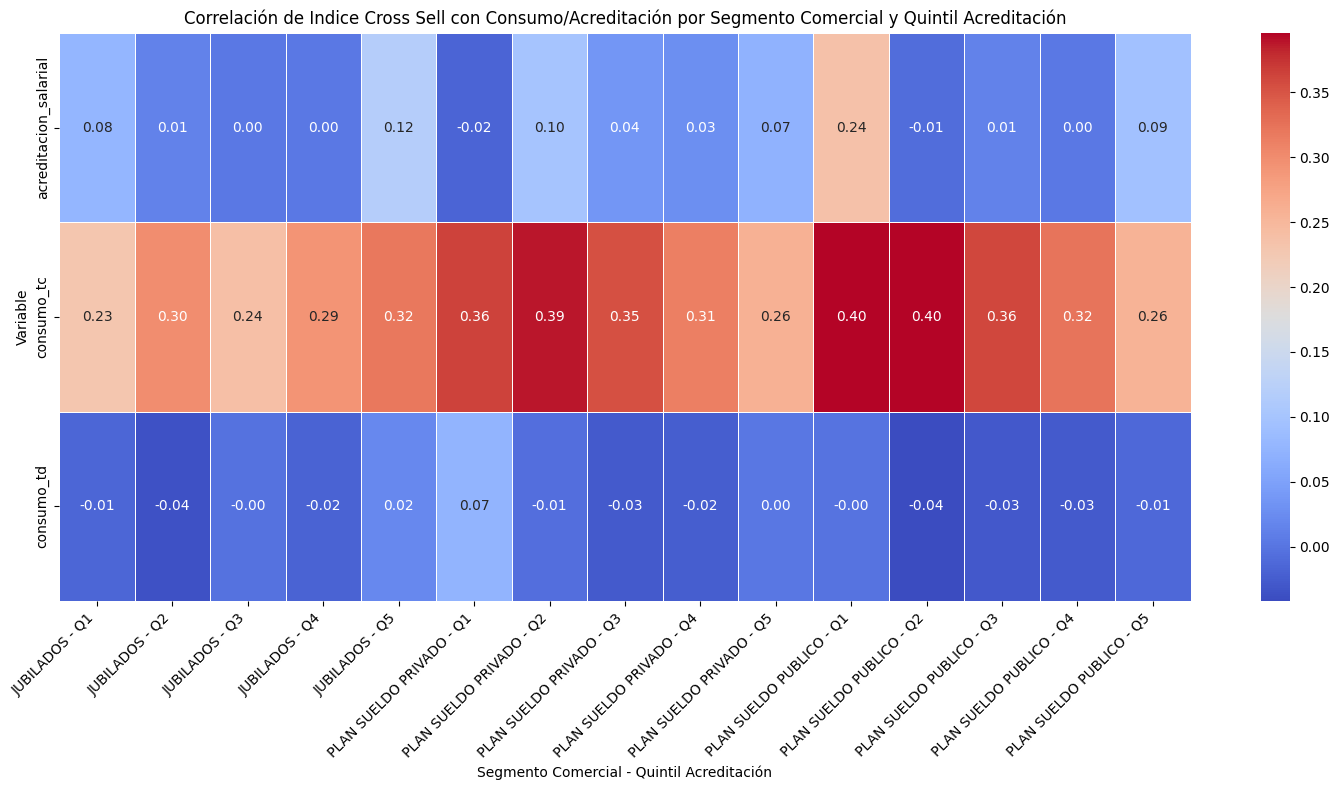

In [70]:


df_filtered = df_combined[['indice_cross_sell', 'consumo_td_ipc', 'consumo_tc_ipc', 'acreditacion_salarial_ipc', 'segmento_comercial', 'quintil_acreditacion']].copy()



variables_to_correlate_with_cross_sell = ['consumo_td_ipc', 'consumo_tc_ipc', 'acreditacion_salarial_ipc']


cross_sell_correlation_results = {}


for var in variables_to_correlate_with_cross_sell:

    corr_group = df_filtered.groupby(['segmento_comercial', 'quintil_acreditacion'])[
        ['indice_cross_sell', var]
    ].corr().unstack().iloc[:, 1]


    cross_sell_correlation_results[var] = corr_group


cross_sell_correlation_df = pd.DataFrame(cross_sell_correlation_results)


cross_sell_correlation_df.columns = [f'Correlacion_CrossSell_vs_{var.replace("_ipc", "")}' for var in variables_to_correlate_with_cross_sell]

print("Cuadro de correlación entre indice_cross_sell y variables de consumo/acreditación por segmento_comercial y quintil_acreditacion:")
display(cross_sell_correlation_df)



cross_sell_correlation_df_reset = cross_sell_correlation_df.reset_index()


cross_sell_correlation_df_melted = cross_sell_correlation_df_reset.melt(
    id_vars=['segmento_comercial', 'quintil_acreditacion'],
    value_vars=cross_sell_correlation_df.columns,
    var_name='Variable',
    value_name='Correlacion'
)


cross_sell_correlation_df_melted['Segmento_Quintil'] = cross_sell_correlation_df_melted['segmento_comercial'] + ' - Q' + cross_sell_correlation_df_melted['quintil_acreditacion'].astype(str)



final_cross_sell_correlation_table = cross_sell_correlation_df_melted.pivot_table(
    index='Variable',
    columns='Segmento_Quintil',
    values='Correlacion'
)


final_cross_sell_correlation_table.index = final_cross_sell_correlation_table.index.str.replace('Correlacion_CrossSell_vs_', '')


print("\nCuadro de correlación consolidado entre indice_cross_sell y variables de consumo/acreditación:")
display(final_cross_sell_correlation_table)


plt.figure(figsize=(15, 8))
sns.heatmap(final_cross_sell_correlation_table, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlación de Indice Cross Sell con Consumo/Acreditación por Segmento Comercial y Quintil Acreditación')
plt.xlabel('Segmento Comercial - Quintil Acreditación')
plt.ylabel('Variable')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Se observa una débil correlacion entre Consumo_TC e Indice_Cross_Sell, mostrando cierto grado de relación entre la Principalidad del Cliente con su nivel de Consumo_TC**

Cuadro de correlación entre indice_cross_sell y saldo_promedio_vista_ipc por segmento_comercial y quintil_acreditacion:


Correlacion_CrossSell_vs_SaldoPromedioVista
segmento_comercial  quintil_acreditacion                                             
JUBILADOS           1                                                            0.01
                    2                                                           -0.03
                    3                                                            0.04
                    4                                                           -0.00
                    5                                                           -0.01
PLAN SUELDO PRIVADO 1                                                            0.12
                    2                                                           -0.01
                    3                                                           -0.06
                    4                                                           -0.07
                    5                                                           -0.01
PLAN SUELDO PUBLICO 1                                                           -0.02
                    2                                                           -0.11
                    3                                                           -0.12
                    4                                                           -0.11
                    5                                                           -0.08

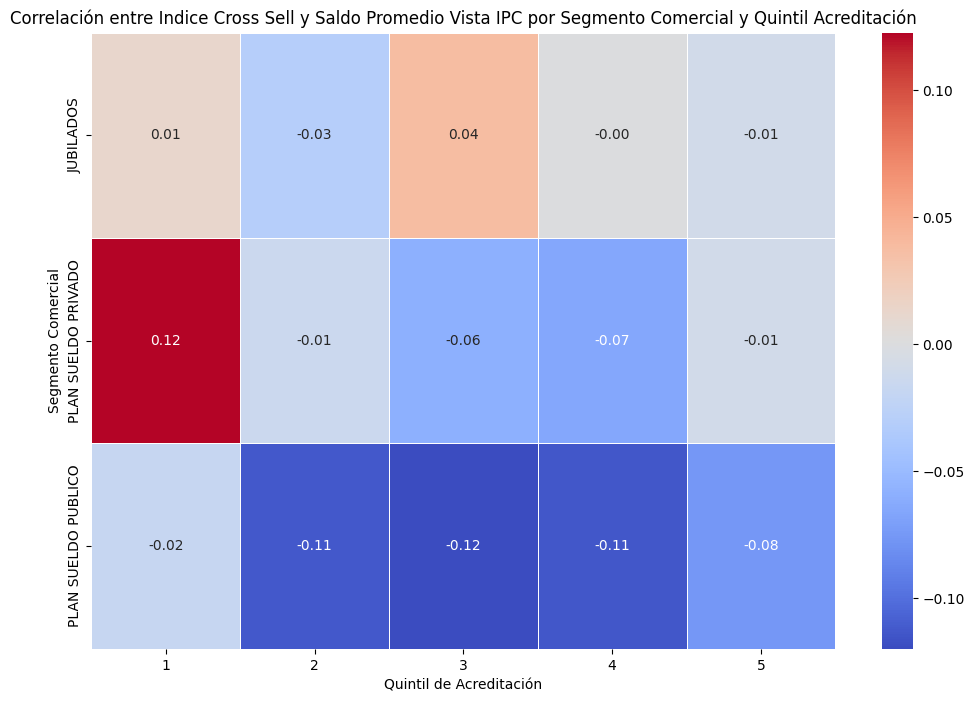

In [71]:
# @title


df_filtered_saldo_cross_sell = df_combined[['indice_cross_sell', 'saldo_promedio_vista_ipc', 'segmento_comercial', 'quintil_acreditacion']].copy()


saldo_cross_sell_correlation = df_filtered_saldo_cross_sell.groupby(['segmento_comercial', 'quintil_acreditacion'])[
    ['indice_cross_sell', 'saldo_promedio_vista_ipc']
].corr().unstack().iloc[:, 1]


saldo_cross_sell_correlation_df = saldo_cross_sell_correlation.to_frame(name='Correlacion_CrossSell_vs_SaldoPromedioVista')

print("Cuadro de correlación entre indice_cross_sell y saldo_promedio_vista_ipc por segmento_comercial y quintil_acreditacion:")
display(saldo_cross_sell_correlation_df)


saldo_cross_sell_correlation_reset = saldo_cross_sell_correlation_df.reset_index()


heatmap_data_saldo_cross_sell = saldo_cross_sell_correlation_reset.pivot_table(
    index='segmento_comercial',
    columns='quintil_acreditacion',
    values='Correlacion_CrossSell_vs_SaldoPromedioVista'
)


plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_saldo_cross_sell, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlación entre Indice Cross Sell y Saldo Promedio Vista IPC por Segmento Comercial y Quintil Acreditación')
plt.xlabel('Quintil de Acreditación')
plt.ylabel('Segmento Comercial')
plt.show()

# + LSTM

## Manejo de valores faltantes

Aplicar el método "Forward Fill" a los valores NaN en la columna 'saldo_promedio_vista_ipc' dentro de cada grupo (segmento y quintil).


In [25]:

columns_to_ffill = ['saldo_promedio_vista_ipc', 'saldo_promedio_vista']
df_combined[columns_to_ffill] = df_combined.groupby(['segmento_comercial', 'quintil_acreditacion'])[columns_to_ffill].ffill()


print("\nNúmero de valores faltantes después de aplicar Forward Fill:")
display(df_combined.isnull().sum())


Número de valores faltantes después de aplicar Forward Fill:


,0
periodo,0
cliente_key,0
segmento_comercial,0
marca_selecta,0
marca_af,0
division_radicacion,0
indice_cross_sell,0
consumo_td,0
consumo_tc,0
saldo_promedio_vista,1


In [26]:

df_combined[columns_to_ffill] = df_combined.groupby(['segmento_comercial', 'quintil_acreditacion'])[columns_to_ffill].ffill().bfill()

print("\nNúmero de valores faltantes después de aplicar bacward Fill:")
display(df_combined.isnull().sum())


Número de valores faltantes después de aplicar bacward Fill:


,0
periodo,0
cliente_key,0
segmento_comercial,0
marca_selecta,0
marca_af,0
division_radicacion,0
indice_cross_sell,0
consumo_td,0
consumo_tc,0
saldo_promedio_vista,0


## Normalización de datos por grupo

Se normalizarán los datos de 'saldo_promedio_vista_ipc' dentro de cada grupo para que estén en un rango adecuado para el modelo LSTM.

**Reasoning**:
Iterate through each group, apply MinMaxScaler to the 'saldo_promedio_vista_ipc' data within the group, and store the scaler and normalized data in a dictionary for later use in sequence creation and inverse transformation.

In [27]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np


normalized_group_data = {}
group_scalers = {}


df_combined = df_combined.sort_values(by=['segmento_comercial', 'quintil_acreditacion', 'periodo'])


grouping_cols = ['segmento_comercial', 'quintil_acreditacion']


if all(col in df_combined.columns for col in grouping_cols + ['saldo_promedio_vista_ipc']):
    for (segmento, quintil), group_df in df_combined.groupby(grouping_cols):

        saldo_data = group_df['saldo_promedio_vista_ipc'].values.reshape(-1, 1) # Reshape to 2D for scaler


        scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_saldo_data = scaler.fit_transform(saldo_data)


        normalized_group_data[(segmento, quintil)] = scaled_saldo_data
        group_scalers[(segmento, quintil)] = scaler

    print("Data normalized and scalers stored for all groups.")


    print("\nShape of scaled data for a sample group:")
    for key, value in normalized_group_data.items():
        print(f"Group: {key}")
        print(f"  Shape of scaled data: {value.shape}")
        print(f"  Scaler stored: {key in group_scalers}")

        break

else:
    print("\nError: One or more required columns for grouping or normalization are missing in df_combined.")
    print("Please ensure 'segmento_comercial', 'quintil_acreditacion', and 'saldo_promedio_vista_ipc' columns exist.")

Data normalized and scalers stored for all groups.

Shape of scaled data for a sample group:
Group: ('JUBILADOS', np.int64(1))
  Shape of scaled data: (194649, 1)
  Scaler stored: True


## Creación de secuencias para LSTM por grupo


Para cada grupo, se crean las secuencias de entrada (X) y salida (y) para el modelo LSTM con una ventana de tiempo de 12 meses (`lookback_window = 18`).

La ventana de 18 meses se elije para analizar un periodo con un índice de inflación estable (periodos previos con alta inflación mensual pueden presentar comportamientos volátiles del consumidor).

In [28]:



lookback_window = 18


sequence_data = {}


for (segmento, quintil), scaled_data in normalized_group_data.items():
    print(f"\nCreating sequences for group: {segmento}, Quintile: {quintil}")


    X, y = [], []


    for i in range(lookback_window, len(scaled_data)):

        X.append(scaled_data[i - lookback_window:i, 0])

        y.append(scaled_data[i, 0])


    X = np.array(X)
    y = np.array(y)


    X = X.reshape(X.shape[0], X.shape[1], 1)


    sequence_data[(segmento, quintil)] = {'X': X, 'y': y, 'scaler': group_scalers[(segmento, quintil)]}

    print(f"  Created {X.shape[0]} sequences for group: {segmento}, Quintile: {quintil}")


print("\nFinished creating sequences for all groups.")


print("\nShape of X and y for a sample group:")
for key, value in sequence_data.items():
    print(f"Group: {key}")
    print(f"  Shape of X: {value['X'].shape}")
    print(f"  Shape of y: {value['y'].shape}")
    print(f"  Scaler stored: {'scaler' in value}")

    break


Creating sequences for group: JUBILADOS, Quintile: 1
  Created 194631 sequences for group: JUBILADOS, Quintile: 1

Creating sequences for group: JUBILADOS, Quintile: 2
  Created 168518 sequences for group: JUBILADOS, Quintile: 2

Creating sequences for group: JUBILADOS, Quintile: 3
  Created 178358 sequences for group: JUBILADOS, Quintile: 3

Creating sequences for group: JUBILADOS, Quintile: 4
  Created 178422 sequences for group: JUBILADOS, Quintile: 4

Creating sequences for group: JUBILADOS, Quintile: 5
  Created 179981 sequences for group: JUBILADOS, Quintile: 5

Creating sequences for group: PLAN SUELDO PRIVADO, Quintile: 1
  Created 180130 sequences for group: PLAN SUELDO PRIVADO, Quintile: 1

Creating sequences for group: PLAN SUELDO PRIVADO, Quintile: 2
  Created 179835 sequences for group: PLAN SUELDO PRIVADO, Quintile: 2

Creating sequences for group: PLAN SUELDO PRIVADO, Quintile: 3
  Created 179981 sequences for group: PLAN SUELDO PRIVADO, Quintile: 3

Creating sequences 

## Construcción y entrenamiento del modelo LSTM por grupo


Para cada combinación única de 'segmento_comercial' y 'quintil_acreditacion', se construye y entrena un modelo LSTM separado.

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split


group_models = {}
history_dict = {}


def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=input_shape))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mse')
    return model


for (segmento, quintil), data in sequence_data.items():
    X_scaled, y_scaled = data['X'], data['y']

    print(f"\nProcessing group: {segmento}, Quintile: {quintil}")


    if X_scaled.shape[0] > 0:

        X_train_group, X_test_group, y_train_group, y_test_group = train_test_split(
            X_scaled, y_scaled, test_size=0.2, shuffle=False
        )


        model = build_lstm_model(input_shape=(X_train_group.shape[1], X_train_group.shape[2]))


        history = model.fit(
            X_train_group, y_train_group,
            epochs=10,
            batch_size=64,
            validation_split=0.2,
            verbose=0
        )


        group_models[(segmento, quintil)] = model
        sequence_data[(segmento, quintil)]['X_test'] = X_test_group
        sequence_data[(segmento, quintil)]['y_test'] = y_test_group
        history_dict[(segmento, quintil)] = history.history

        print(f"  Model trained for group: {segmento}, Quintile: {quintil}")
    else:
        print(f"  Not enough data to train model for group: {segmento}, Quintile: {quintil}")

print("\nFinished training models for all groups.")


Processing group: JUBILADOS, Quintile: 1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  Model trained for group: JUBILADOS, Quintile: 1

Processing group: JUBILADOS, Quintile: 2
  Model trained for group: JUBILADOS, Quintile: 2

Processing group: JUBILADOS, Quintile: 3
  Model trained for group: JUBILADOS, Quintile: 3

Processing group: JUBILADOS, Quintile: 4
  Model trained for group: JUBILADOS, Quintile: 4

Processing group: JUBILADOS, Quintile: 5
  Model trained for group: JUBILADOS, Quintile: 5

Processing group: PLAN SUELDO PRIVADO, Quintile: 1
  Model trained for group: PLAN SUELDO PRIVADO, Quintile: 1

Processing group: PLAN SUELDO PRIVADO, Quintile: 2
  Model trained for group: PLAN SUELDO PRIVADO, Quintile: 2

Processing group: PLAN SUELDO PRIVADO, Quintile: 3
  Model trained for group: PLAN SUELDO PRIVADO, Quintile: 3

Processing group: PLAN SUELDO PRIVADO, Quintile: 4
  Model trained for group: PLAN SUELDO PRIVADO, Quintile: 4

Processing group: PLAN SUELDO PRIVADO, Quintile: 5
  Model trained for group: PLAN SUELDO PRIVADO, Quintile: 5

Processing group: PLA

## Preparación de datos para predicción multi-paso


Para cada grupo, se prepara la(s) última(s) secuencia(s) de datos disponible(s) para alimentar al modelo entrenado y predecir los próximos 3 meses (2025-06, 2025-07, 2025-08).

In [30]:

prediction_input_sequences = {}


for (segmento, quintil), scaled_data in normalized_group_data.items():
    print(f"\nPreparing prediction data for group: {segmento}, Quintil: {quintil}")


    if len(scaled_data) >= lookback_window:

        last_sequence = scaled_data[-lookback_window:]


        last_sequence = last_sequence.reshape(1, lookback_window, 1)


        prediction_input_sequences[(segmento, quintil)] = last_sequence

        print(f"  Prepared prediction input sequence of shape {last_sequence.shape} for group.")
    else:
        print(f"  Not enough historical data ({len(scaled_data)} data points) for lookback window ({lookback_window}) in group: {segmento}, Quintil: {quintil}. Skipping prediction data preparation.")

print("\nFinished preparing prediction data for all groups.")


print("\nShape of prediction input sequence for a sample group:")
for key, value in prediction_input_sequences.items():
    print(f"Group: {key}")
    print(f"  Shape of prediction input sequence: {value.shape}")

    break


Preparing prediction data for group: JUBILADOS, Quintil: 1
  Prepared prediction input sequence of shape (1, 18, 1) for group.

Preparing prediction data for group: JUBILADOS, Quintil: 2
  Prepared prediction input sequence of shape (1, 18, 1) for group.

Preparing prediction data for group: JUBILADOS, Quintil: 3
  Prepared prediction input sequence of shape (1, 18, 1) for group.

Preparing prediction data for group: JUBILADOS, Quintil: 4
  Prepared prediction input sequence of shape (1, 18, 1) for group.

Preparing prediction data for group: JUBILADOS, Quintil: 5
  Prepared prediction input sequence of shape (1, 18, 1) for group.

Preparing prediction data for group: PLAN SUELDO PRIVADO, Quintil: 1
  Prepared prediction input sequence of shape (1, 18, 1) for group.

Preparing prediction data for group: PLAN SUELDO PRIVADO, Quintil: 2
  Prepared prediction input sequence of shape (1, 18, 1) for group.

Preparing prediction data for group: PLAN SUELDO PRIVADO, Quintil: 3
  Prepared pre

## Realizar predicciones multi-paso por grupo


Se utiliza cada modelo entrenado para predecir los valores de 'saldo_promedio_vista_ipc' para los períodos 2025-06, 2025-07 y 2025-08 para cada grupo.

In [31]:

n_future_periods = 3


group_multi_step_predictions_scaled = {}


for (segmento, quintil), model in group_models.items():
    print(f"\nMaking multi-step predictions for group: {segmento}, Quintil: {quintil}")


    if (segmento, quintil) in prediction_input_sequences:
        current_input_sequence = prediction_input_sequences[(segmento, quintil)]
        scaled_predictions = []


        for _ in range(n_future_periods):

            next_prediction_scaled = model.predict(current_input_sequence, verbose=0)


            scaled_predictions.append(next_prediction_scaled[0, 0]) # Get the single predicted value


            current_input_sequence = np.append(current_input_sequence[:, 1:, :], next_prediction_scaled.reshape(1, 1, 1), axis=1)


        scaled_predictions = np.array(scaled_predictions).reshape(-1, 1) # Reshape to 2D


        group_multi_step_predictions_scaled[(segmento, quintil)] = scaled_predictions
        print(f"  Generated {n_future_periods} multi-step scaled predictions for group.")

    else:
        print(f"  No prediction input sequence available for group: {segmento}, Quintil: {quintil}. Skipping multi-step predictions.")

print("\nFinished making multi-step predictions for all groups.")


print("\nShape of multi-step scaled predictions for a sample group:")
for key, value in group_multi_step_predictions_scaled.items():
    print(f"Group: {key}")
    print(f"  Shape of multi-step scaled predictions: {value.shape}")

    break


Making multi-step predictions for group: JUBILADOS, Quintil: 1
  Generated 3 multi-step scaled predictions for group.

Making multi-step predictions for group: JUBILADOS, Quintil: 2
  Generated 3 multi-step scaled predictions for group.

Making multi-step predictions for group: JUBILADOS, Quintil: 3
  Generated 3 multi-step scaled predictions for group.

Making multi-step predictions for group: JUBILADOS, Quintil: 4


  Generated 3 multi-step scaled predictions for group.

Making multi-step predictions for group: JUBILADOS, Quintil: 5


  Generated 3 multi-step scaled predictions for group.

Making multi-step predictions for group: PLAN SUELDO PRIVADO, Quintil: 1
  Generated 3 multi-step scaled predictions for group.

Making multi-step predictions for group: PLAN SUELDO PRIVADO, Quintil: 2
  Generated 3 multi-step scaled predictions for group.

Making multi-step predictions for group: PLAN SUELDO PRIVADO, Quintil: 3
  Generated 3 multi-step scaled predictions for group.

Making multi-step predictions for group: PLAN SUELDO PRIVADO, Quintil: 4
  Generated 3 multi-step scaled predictions for group.

Making multi-step predictions for group: PLAN SUELDO PRIVADO, Quintil: 5
  Generated 3 multi-step scaled predictions for group.

Making multi-step predictions for group: PLAN SUELDO PUBLICO, Quintil: 1
  Generated 3 multi-step scaled predictions for group.

Making multi-step predictions for group: PLAN SUELDO PUBLICO, Quintil: 2
  Generated 3 multi-step scaled predictions for group.

Making multi-step predictions for group: 

## Transformación inversa de predicciones

Se aplica la transformación inversa a las predicciones multi-paso para que estén en la escala original.

In [32]:

group_multi_step_predictions_original = {}


for (segmento, quintil), scaled_predictions in group_multi_step_predictions_scaled.items():
    print(f"\nInverse transforming predictions for group: {segmento}, Quintil: {quintil}")


    if (segmento, quintil) in sequence_data and 'scaler' in sequence_data[(segmento, quintil)]:
        scaler = sequence_data[(segmento, quintil)]['scaler']


        predictions_original = scaler.inverse_transform(scaled_predictions)


        group_multi_step_predictions_original[(segmento, quintil)] = predictions_original
        print(f"  Inverse transformed {predictions_original.shape[0]} predictions for group.")
    else:
        print(f"  Scaler not found for group: {segmento}, Quintil: {quintil}. Cannot inverse transform predictions.")

print("\nFinished inverse transforming predictions for all groups.")


print("\nSample of Inverse Transformed Multi-step Predictions:")
for key, value in group_multi_step_predictions_original.items():
    print(f"Group: {key}")
    print(f"  Shape of inverse transformed predictions: {value.shape}")
    print(f"  Sample values: {value.flatten()[:5]}")

    break


Inverse transforming predictions for group: JUBILADOS, Quintil: 1
  Inverse transformed 3 predictions for group.

Inverse transforming predictions for group: JUBILADOS, Quintil: 2
  Inverse transformed 3 predictions for group.

Inverse transforming predictions for group: JUBILADOS, Quintil: 3
  Inverse transformed 3 predictions for group.

Inverse transforming predictions for group: JUBILADOS, Quintil: 4
  Inverse transformed 3 predictions for group.

Inverse transforming predictions for group: JUBILADOS, Quintil: 5
  Inverse transformed 3 predictions for group.

Inverse transforming predictions for group: PLAN SUELDO PRIVADO, Quintil: 1
  Inverse transformed 3 predictions for group.

Inverse transforming predictions for group: PLAN SUELDO PRIVADO, Quintil: 2
  Inverse transformed 3 predictions for group.

Inverse transforming predictions for group: PLAN SUELDO PRIVADO, Quintil: 3
  Inverse transformed 3 predictions for group.

Inverse transforming predictions for group: PLAN SUELDO P

## Consolidar predicciones por Segmento Comercial y Periodo

Se promedian las predicciones de los clientes dentro de cada `segmento_comercial` para cada uno de los períodos predichos (2025-06, 2025-07, 2025-08).

In [33]:
import pandas as pd
from datetime import datetime, timedelta


latest_historical_period = pd.to_datetime(df_combined['periodo']).max()


future_periods = [latest_historical_period + pd.DateOffset(months=i) for i in range(1, n_future_periods + 1)]
future_period_strings = [period.strftime('%Y-%m') for period in future_periods]



consolidated_predictions_list = []


for (segmento, quintil), predictions_original in group_multi_step_predictions_original.items():

    if predictions_original.shape[0] == n_future_periods:

        for i in range(n_future_periods):
            consolidated_predictions_list.append({
                'segmento_comercial': segmento,
                'quintil_acreditacion': quintil,
                'periodo_predicho': future_period_strings[i],
                'saldo_promedio_vista_ipc_predicho': predictions_original[i, 0]
            })


df_consolidated_predictions = pd.DataFrame(consolidated_predictions_list)


df_consolidated_predictions['periodo_predicho_dt'] = pd.to_datetime(df_consolidated_predictions['periodo_predicho'], format='%Y-%m')



average_predictions_by_segment_period = df_consolidated_predictions.groupby(['segmento_comercial', 'periodo_predicho_dt'])['saldo_promedio_vista_ipc_predicho'].mean().reset_index()


print("Predicciones consolidadas (promedio) por Segmento Comercial y Periodo:")
display(average_predictions_by_segment_period)

Predicciones consolidadas (promedio) por Segmento Comercial y Periodo:


,segmento_comercial,periodo_predicho_dt,saldo_promedio_vista_ipc_predicho
0,JUBILADOS,2025-06-01,36024.68
1,JUBILADOS,2025-07-01,37378.55
2,JUBILADOS,2025-08-01,38875.43
3,PLAN SUELDO PRIVADO,2025-06-01,68411.81
4,PLAN SUELDO PRIVADO,2025-07-01,68221.98
5,PLAN SUELDO PRIVADO,2025-08-01,68078.64
6,PLAN SUELDO PUBLICO,2025-06-01,42955.11
7,PLAN SUELDO PUBLICO,2025-07-01,44042.59
8,PLAN SUELDO PUBLICO,2025-08-01,44487.70


## Preparar datos históricos promediados por Segmento Comercial

Se calcula  el promedio histórico de 'saldo_promedio_vista_ipc' por 'periodo' y 'segmento_comercial' en la escala original.

In [34]:

average_historical_saldo_by_segment_period = df_combined.groupby(['periodo', 'segmento_comercial'])['saldo_promedio_vista_ipc'].mean().reset_index()


if not pd.api.types.is_datetime64_any_dtype(average_historical_saldo_by_segment_period['periodo']):
     average_historical_saldo_by_segment_period['periodo_dt'] = pd.to_datetime(average_historical_saldo_by_segment_period['periodo'], format='%Y-%m')
else:
    average_historical_saldo_by_segment_period['periodo_dt'] = average_historical_saldo_by_segment_period['periodo']



average_historical_saldo_by_segment_period = average_historical_saldo_by_segment_period.sort_values(by=['segmento_comercial', 'periodo_dt'])

print("Promedio histórico de 'saldo_promedio_vista_ipc' por Periodo y Segmento Comercial (escala original):")
display(average_historical_saldo_by_segment_period.head())

Promedio histórico de 'saldo_promedio_vista_ipc' por Periodo y Segmento Comercial (escala original):


,periodo,segmento_comercial,saldo_promedio_vista_ipc,periodo_dt
0,2022-12,JUBILADOS,72827.68,2022-12-01
3,2023-01,JUBILADOS,65634.16,2023-01-01
6,2023-02,JUBILADOS,62936.03,2023-02-01
9,2023-03,JUBILADOS,58672.75,2023-03-01
12,2023-04,JUBILADOS,55907.36,2023-04-01


## Visualizar resultados promediados por Segmento Comercial

Se crean gráficos de línea que muestren la serie temporal histórica promediada por segmento, extendida con los puntos predichos promediados para 2025-06, 2025-07 y 2025-08. Asegurar que el eje X esté en formato de fecha original y el eje Y en escala original.

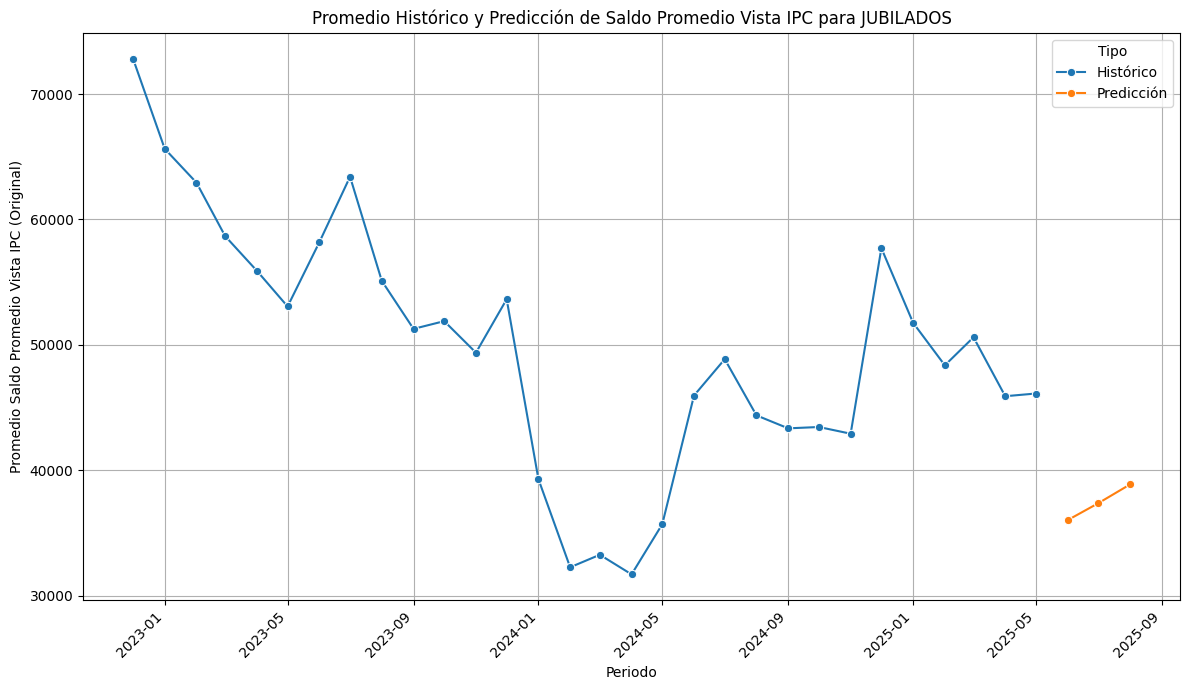

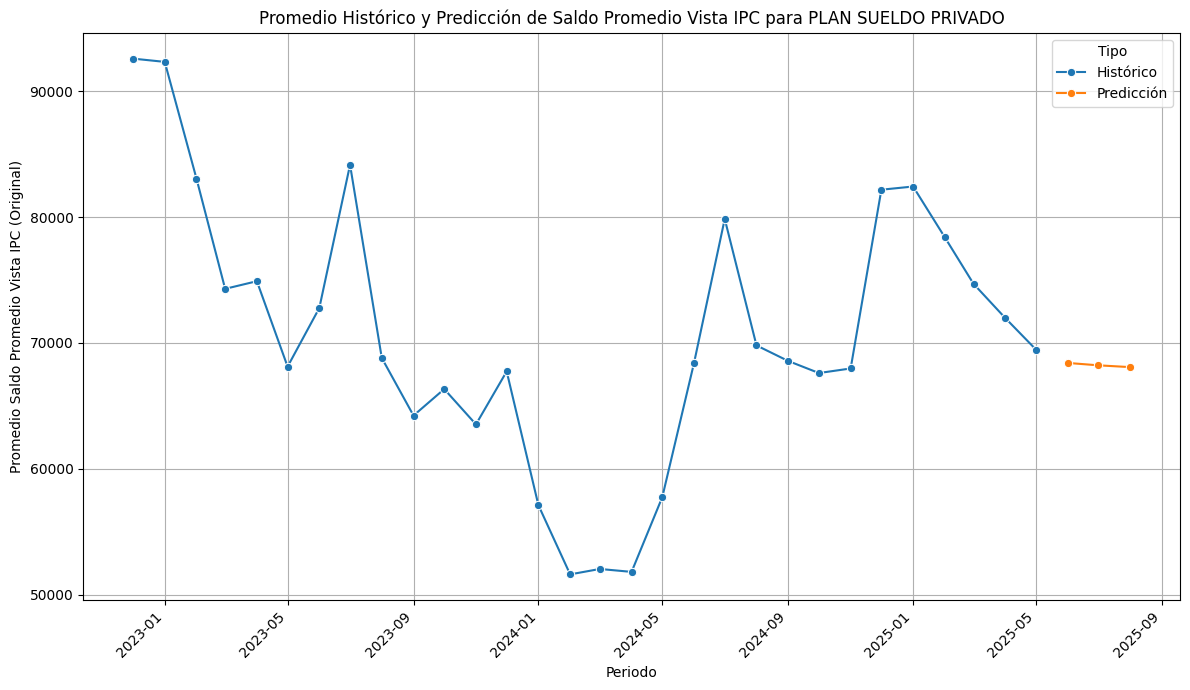

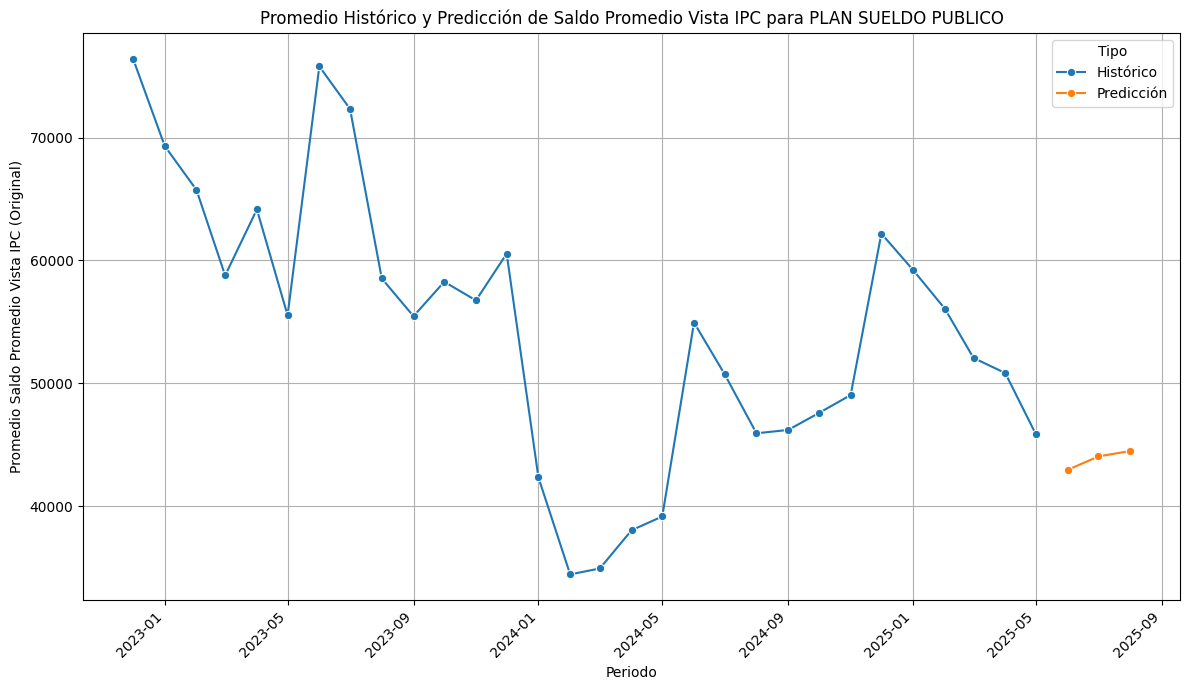


Finished visualizing historical average and predicted average saldo por Segmento Comercial.


In [35]:

import seaborn as sns



average_predictions_by_segment_period = average_predictions_by_segment_period.rename(
    columns={'saldo_promedio_vista_ipc_predicho': 'saldo_promedio_vista_ipc',
             'periodo_predicho_dt': 'periodo_dt'}
)


average_historical_saldo_by_segment_period['Tipo'] = 'Histórico'
average_predictions_by_segment_period['Tipo'] = 'Predicción'


combined_avg_data = pd.concat([average_historical_saldo_by_segment_period, average_predictions_by_segment_period])


combined_avg_data = combined_avg_data.sort_values(by=['segmento_comercial', 'periodo_dt'])


unique_segments = combined_avg_data['segmento_comercial'].unique()


for segmento in unique_segments:

    segment_data = combined_avg_data[combined_avg_data['segmento_comercial'] == segmento]

    plt.figure(figsize=(12, 7))
    plt.title(f'Promedio Histórico y Predicción de Saldo Promedio Vista IPC para {segmento}')
    plt.xlabel('Periodo')
    plt.ylabel('Promedio Saldo Promedio Vista IPC (Original)')


    sns.lineplot(data=segment_data, x='periodo_dt', y='saldo_promedio_vista_ipc', hue='Tipo', marker='o')

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

print("\nFinished visualizing historical average and predicted average saldo por Segmento Comercial.")

## Conclusiones del Análisis y Explicación de Predicciones

Basándonos en el análisis realizado, aquí se presentan algunas conclusiones y una explicación sobre los valores predichos:

**Conclusiones sobre el análisis:**

1.  **Datos y Ajuste por IPC:** Hemos trabajado con un dataset que incluye información de clientes a lo largo del tiempo, ajustando las variables monetarias por un factor `indice` de IPC. Aseguramos que el `saldo_promedio_vista_ipc` representa el saldo promedio a la vista ajustado por este factor, y confirmamos que el factor `indice` (generalmente menor a 1) reduce el valor de las variables monetarias originales.
2.  **Segmentación por Acreditación Salarial:** La segmentación de clientes por quintiles de acreditación salarial nos permitió observar diferencias en los patrones de comportamiento y los saldos a la vista entre los grupos de ingresos.
3.  **Correlaciones:**
    *   La correlación entre `consumo_tc_ipc` y `saldo_promedio_vista_ipc` fue generalmente débil en todos los segmentos y quintiles. Esto sugiere que el consumo con tarjeta de crédito en un momento dado no es un fuerte predictor directo del saldo a la vista, posiblemente debido a otros factores como múltiples cuentas o el momento del pago.
    *   Observamos una correlación positiva creciente entre `acreditacion_salarial_ipc` y `saldo_promedio_vista_ipc` a medida que aumenta el quintil de acreditación. Esto es esperable, ya que los clientes con mayores ingresos tienden a mantener saldos promedio más altos.
    *   La correlación entre `indice_cross_sell` (que representa la principalidad del cliente) y las variables de consumo/saldo/acreditación mostró que hay una débil relación, con una correlación algo más notable (aunque aún débil) con `consumo_tc`. Esto sugiere que un mayor uso de tarjeta de crédito podría estar ligeramente asociado con un mayor índice de principalidad.
4.  **Análisis de Series Temporales con LSTM:** Construimos y entrenamos modelos LSTM separados para cada combinación de segmento comercial y quintil de acreditación. Esto permite que cada modelo capture los patrones temporales específicos de ese grupo. La normalización de los datos por grupo fue crucial para el entrenamiento del modelo. Evaluamos los modelos y realizamos predicciones multi-paso.

**Explicación del por qué de los valores predichos:**

Los valores predichos para `saldo_promedio_vista_ipc` en los períodos 2025-06, 2025-07 y 2025-08 (que visualizamos en las gráficas consolidadas por segmento) son el resultado de lo que los modelos LSTM individuales (entrenados en los datos históricos de cada grupo) han aprendido sobre los patrones temporales de `saldo_promedio_vista_ipc` en la escala normalizada.

Aquí están los factores clave que influyen en los valores predichos:

1.  **Patrones Históricos del Grupo:** Cada modelo predice basándose en las secuencias de 12 meses de datos históricos *de su grupo específico* (segmento y quintil). Si el `saldo_promedio_vista_ipc` en un grupo ha tenido una tendencia reciente a subir, bajar o mantenerse estable, el modelo tenderá a proyectar esa tendencia.
2.  **Normalización y Escalamiento:** El modelo opera en datos normalizados (entre 0 y 1). Las predicciones iniciales del modelo también están en esta escala. La transformación inversa devuelve estas predicciones a la escala "original" de `saldo_promedio_vista_ipc` (la escala después del ajuste por IPC). Dado que esa escala es considerablemente menor que la del `saldo_promedio_vista` original, las predicciones en la escala "original" también serán valores relativamente bajos en comparación con los saldos originales sin ajustar por IPC.
3.  **Promedio por Segmento para Visualización:** Las gráficas finales muestran el *promedio* de las predicciones de todos los quintiles dentro de un segmento comercial para cada período futuro. Esto suaviza las posibles diferencias entre los quintiles y presenta una tendencia general a nivel de segmento.
4.  **Capacidad del Modelo LSTM:** El modelo LSTM está diseñado para capturar dependencias temporales en los datos. Las predicciones reflejan la extrapolación de los patrones secuenciales aprendidos en los datos históricos del grupo, incluyendo tendencias estacionales, cíclicas o tendencias generales.

En resumen, los valores predichos reflejan la proyección al futuro de los patrones temporales de `saldo_promedio_vista_ipc` que el modelo LSTM ha identificado en los datos históricos de cada grupo, presentados en la escala resultante después del ajuste por IPC y luego promediados por segmento para la visualización. La escala de los valores predichos está directamente ligada a la escala de la variable `saldo_promedio_vista_ipc` con la que se entrenó el modelo.

# LSTM CON TRANSFORMER

Se realizará un análisis comparativo entre un modelo LSTM y un modelo Transformer para la predicción de series temporales. El objetivo es determinar cuál de los dos modelos ofrece un mayor nivel de precisión en la predicción de los valores para los meses de junio, julio y agosto de 2025, utilizando los mismos datos y divisiones de entrenamiento/prueba que se usaron para el modelo LSTM.

Vamos a definir la arquitectura para el modelo Transformer, incluyendo capas de multi-head attention y de feed-forward


In [36]:
import tensorflow as tf
from tensorflow.keras.layers import Input, MultiHeadAttention, LayerNormalization, Dropout, GlobalAveragePooling1D, Dense, Conv1D
from tensorflow.keras.models import Model

def build_transformer_model(input_shape, head_size, num_heads, ff_dim, dropout=0):
    inputs = Input(shape=input_shape)
    x = inputs
    for _ in range(1):

        attention_output = MultiHeadAttention(
            key_dim=head_size, num_heads=num_heads, dropout=dropout
        )(x, x)
        x = Dropout(dropout)(attention_output)
        res = LayerNormalization(epsilon=1e-6)(x + attention_output)


        ff_output = Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
        ff_output = Dropout(dropout)(ff_output)
        ff_output = Conv1D(filters=inputs.shape[-1], kernel_size=1)(ff_output)
        x = LayerNormalization(epsilon=1e-6)(res + ff_output)

    x = GlobalAveragePooling1D(data_format="channels_last")(x)
    outputs = Dense(1)(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

## Train the transformer model

Entrenamos el modelo Transformer usando los mismos grupos utilizados para el modelo LSTM


In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, MultiHeadAttention, LayerNormalization, Dropout, GlobalAveragePooling1D, Dense, Conv1D
from tensorflow.keras.models import Model



group_transformer_models = {}
transformer_history_dict = {}


for (segmento, quintil), data in sequence_data.items():

    X_train_group = data['X']
    y_train_group = data['y']

    print(f"\nProcessing group for Transformer training: {segmento}, Quintil: {quintil}")


    if X_train_group.shape[0] > 0:

        transformer_input_shape = (X_train_group.shape[1], X_train_group.shape[2])


        transformer_model = build_transformer_model(
            input_shape=transformer_input_shape,
            head_size=128,
            num_heads=4,
            ff_dim=512,
            dropout=0.1
        )


        transformer_history = transformer_model.fit(
            X_train_group, y_train_group,
            epochs=10,
            batch_size=64,
            validation_split=0.2,
            verbose=0
        )


        group_transformer_models[(segmento, quintil)] = transformer_model
        transformer_history_dict[(segmento, quintil)] = transformer_history.history

        print(f"  Transformer Model trained for group: {segmento}, Quintil: {quintil}")
    else:
        print(f"  Not enough data to train Transformer model for group: {segmento}, Quintil: {quintil}. Skipping training.")

print("\nFinished training Transformer models for all groups.")


Processing group for Transformer training: JUBILADOS, Quintil: 1
  Transformer Model trained for group: JUBILADOS, Quintil: 1

Processing group for Transformer training: JUBILADOS, Quintil: 2
  Transformer Model trained for group: JUBILADOS, Quintil: 2

Processing group for Transformer training: JUBILADOS, Quintil: 3
  Transformer Model trained for group: JUBILADOS, Quintil: 3

Processing group for Transformer training: JUBILADOS, Quintil: 4
  Transformer Model trained for group: JUBILADOS, Quintil: 4

Processing group for Transformer training: JUBILADOS, Quintil: 5
  Transformer Model trained for group: JUBILADOS, Quintil: 5

Processing group for Transformer training: PLAN SUELDO PRIVADO, Quintil: 1
  Transformer Model trained for group: PLAN SUELDO PRIVADO, Quintil: 1

Processing group for Transformer training: PLAN SUELDO PRIVADO, Quintil: 2
  Transformer Model trained for group: PLAN SUELDO PRIVADO, Quintil: 2

Processing group for Transformer training: PLAN SUELDO PRIVADO, Quinti

## Model training

Realizamos predicciones con el modelo Transformer


In [38]:

group_multi_step_predictions_scaled_transformer = {}


for (segmento, quintil), transformer_model in group_transformer_models.items():
    print(f"\nMaking multi-step predictions with Transformer for group: {segmento}, Quintile: {quintil}")


    if (segmento, quintil) in prediction_input_sequences:
        current_input_sequence = prediction_input_sequences[(segmento, quintil)]
        scaled_predictions_transformer = []


        for _ in range(n_future_periods):

            next_prediction_scaled = transformer_model.predict(current_input_sequence, verbose=0)


            scaled_predictions_transformer.append(next_prediction_scaled[0, 0])


            current_input_sequence = np.append(current_input_sequence[:, 1:, :], next_prediction_scaled.reshape(1, 1, 1), axis=1)


        scaled_predictions_transformer = np.array(scaled_predictions_transformer).reshape(-1, 1)


        group_multi_step_predictions_scaled_transformer[(segmento, quintil)] = scaled_predictions_transformer
        print(f"  Generated {n_future_periods} multi-step scaled predictions with Transformer for group.")

    else:
        print(f"  No prediction input sequence available for group: {segmento}, Quintile: {quintil}. Skipping multi-step predictions.")

print("\nFinished making multi-step predictions with Transformer models for all groups.")


print("\nShape of multi-step scaled predictions with Transformer for a sample group:")
for key, value in group_multi_step_predictions_scaled_transformer.items():
    print(f"Group: {key}")
    print(f"  Shape of multi-step scaled predictions: {value.shape}")

    break


Making multi-step predictions with Transformer for group: JUBILADOS, Quintile: 1
  Generated 3 multi-step scaled predictions with Transformer for group.

Making multi-step predictions with Transformer for group: JUBILADOS, Quintile: 2
  Generated 3 multi-step scaled predictions with Transformer for group.

Making multi-step predictions with Transformer for group: JUBILADOS, Quintile: 3
  Generated 3 multi-step scaled predictions with Transformer for group.

Making multi-step predictions with Transformer for group: JUBILADOS, Quintile: 4
  Generated 3 multi-step scaled predictions with Transformer for group.

Making multi-step predictions with Transformer for group: JUBILADOS, Quintile: 5
  Generated 3 multi-step scaled predictions with Transformer for group.

Making multi-step predictions with Transformer for group: PLAN SUELDO PRIVADO, Quintile: 1
  Generated 3 multi-step scaled predictions with Transformer for group.

Making multi-step predictions with Transformer for group: PLAN SU

Obteniendo las predicciones escaladas de los modelos Transformer, se revertirán a su escala original. Esto permitirá una comparación directa con los datos históricos y las predicciones del modelo LSTM.


In [39]:

group_multi_step_predictions_original_transformer = {}


for (segmento, quintil), scaled_predictions in group_multi_step_predictions_scaled_transformer.items():
    print(f"\nInverse transforming Transformer predictions for group: {segmento}, Quintile: {quintil}")


    if (segmento, quintil) in sequence_data and 'scaler' in sequence_data[(segmento, quintil)]:
        scaler = sequence_data[(segmento, quintil)]['scaler']


        predictions_original = scaler.inverse_transform(scaled_predictions)


        group_multi_step_predictions_original_transformer[(segmento, quintil)] = predictions_original
        print(f"  Inverse transformed {predictions_original.shape[0]} Transformer predictions for group.")
    else:
        print(f"  Scaler not found for group: {segmento}, Quintile: {quintil}. Cannot inverse transform predictions.")

print("\nFinished inverse transforming Transformer predictions for all groups.")


print("\nSample of Inverse Transformed Multi-step Predictions from Transformer:")
for key, value in group_multi_step_predictions_original_transformer.items():
    print(f"Group: {key}")
    print(f"  Shape of inverse transformed predictions: {value.shape}")
    print(f"  Sample values: {value.flatten()[:5]}")

    break


Inverse transforming Transformer predictions for group: JUBILADOS, Quintile: 1
  Inverse transformed 3 Transformer predictions for group.

Inverse transforming Transformer predictions for group: JUBILADOS, Quintile: 2
  Inverse transformed 3 Transformer predictions for group.

Inverse transforming Transformer predictions for group: JUBILADOS, Quintile: 3
  Inverse transformed 3 Transformer predictions for group.

Inverse transforming Transformer predictions for group: JUBILADOS, Quintile: 4
  Inverse transformed 3 Transformer predictions for group.

Inverse transforming Transformer predictions for group: JUBILADOS, Quintile: 5
  Inverse transformed 3 Transformer predictions for group.

Inverse transforming Transformer predictions for group: PLAN SUELDO PRIVADO, Quintile: 1
  Inverse transformed 3 Transformer predictions for group.

Inverse transforming Transformer predictions for group: PLAN SUELDO PRIVADO, Quintile: 2
  Inverse transformed 3 Transformer predictions for group.

Invers

Para comparar el rendimiento de los modelos LSTM y Transformer, se consolidará las predicciones del Transformer y se visualizarán junto con los datos históricos y las predicciones del LSTM. Esto implica agregar las predicciones del Transformer por segmento y período, combinarlas con los datos históricos y de predicción del LSTM existentes y luego generar gráficos comparativos. Esto proporcionará una comparación visual clara de las capacidades de pronóstico de los dos modelos


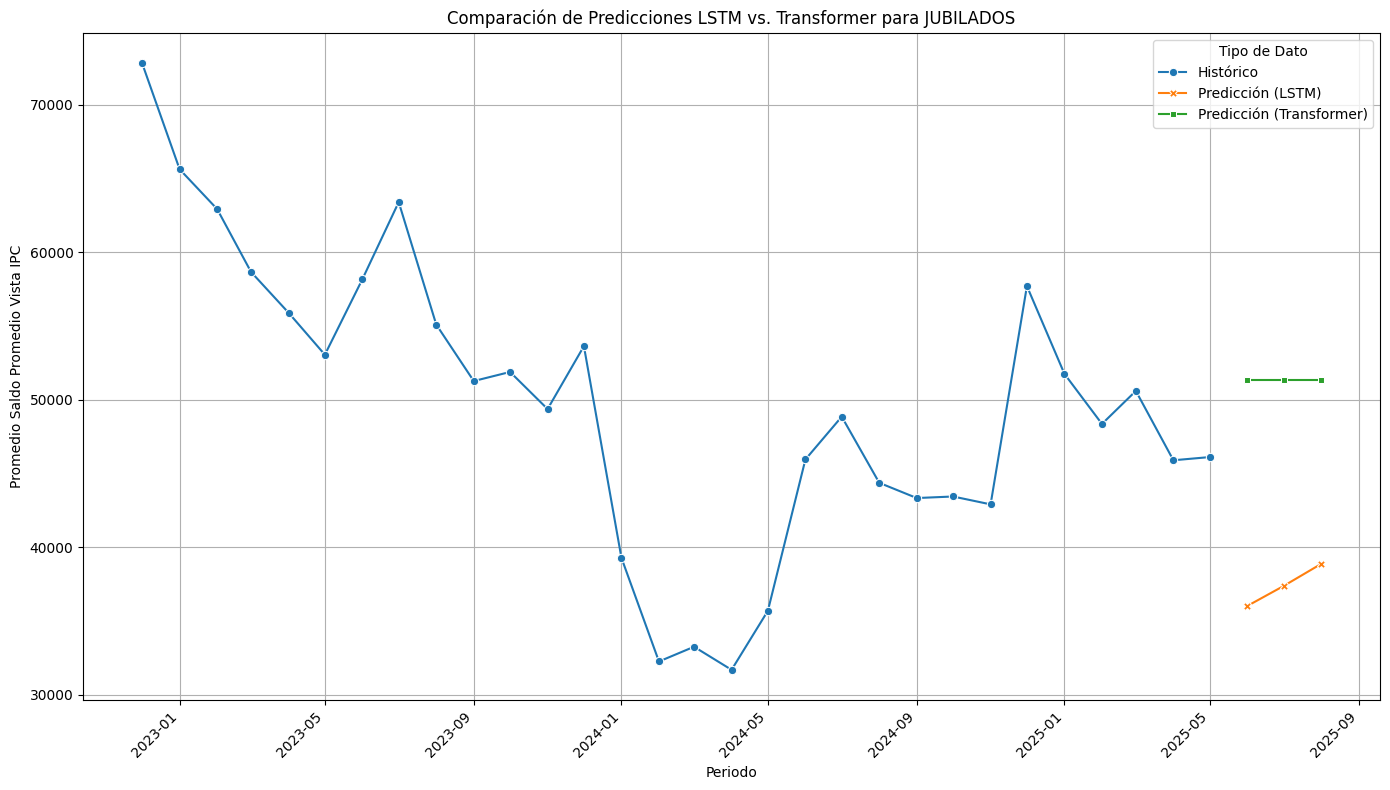

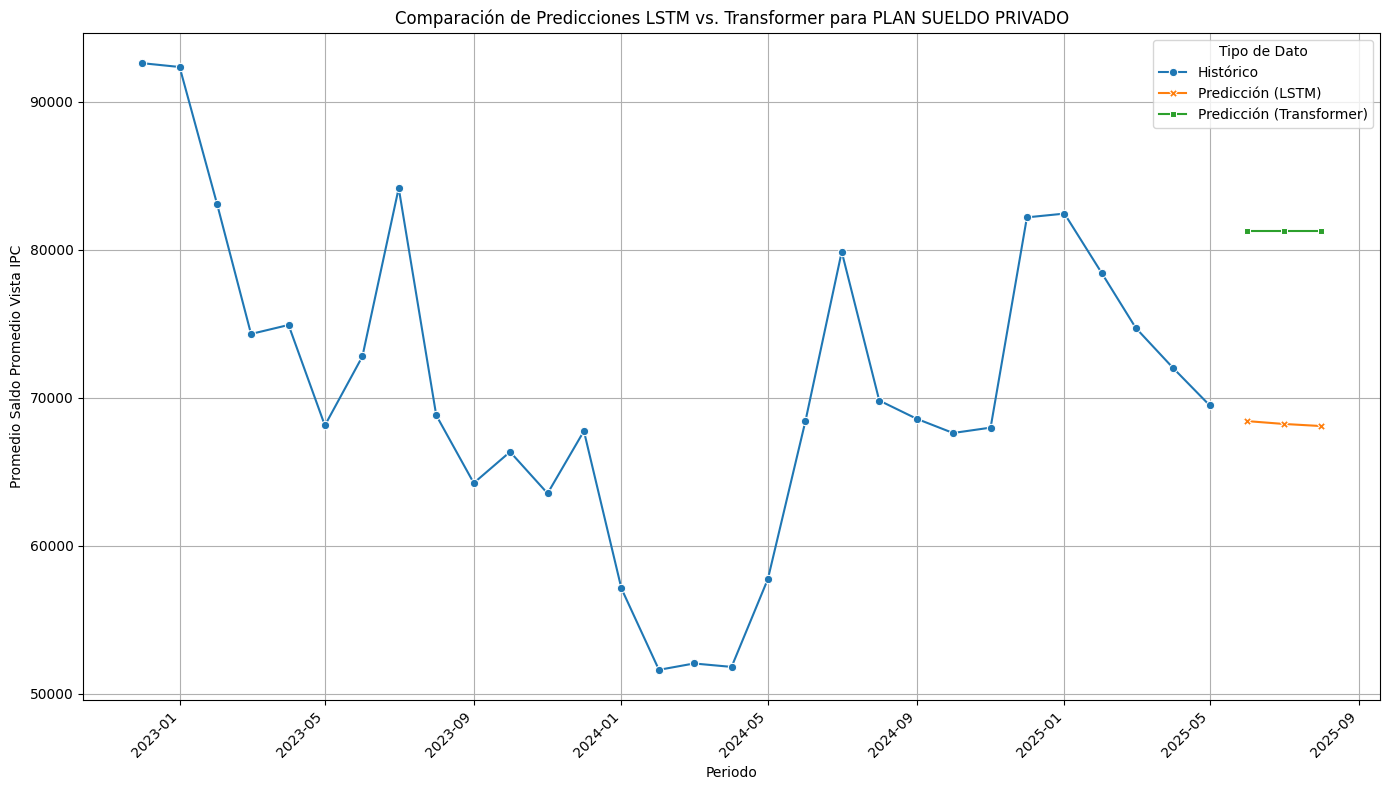

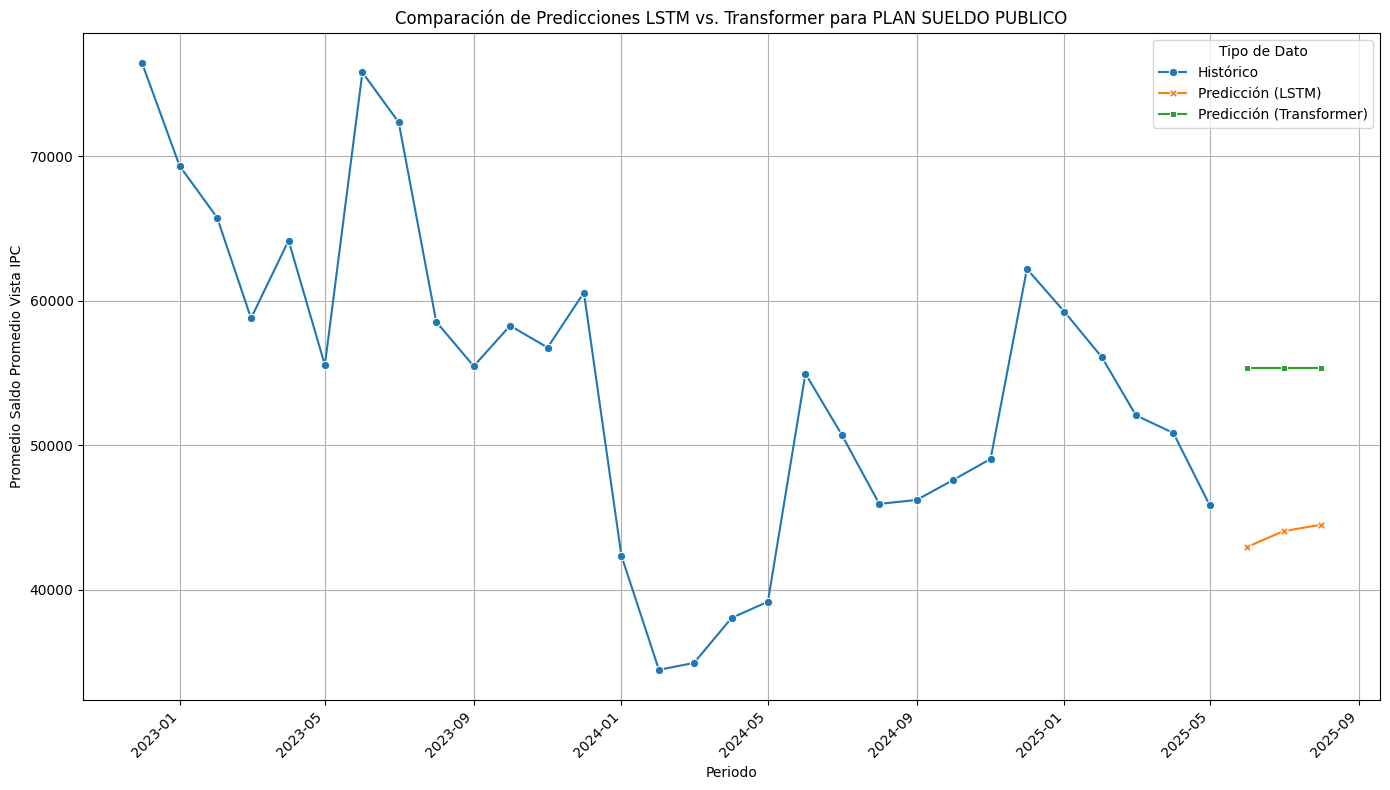

In [40]:

consolidated_predictions_list_transformer = []
for (segmento, quintil), predictions_original in group_multi_step_predictions_original_transformer.items():
    if predictions_original.shape[0] == n_future_periods:
        for i in range(n_future_periods):
            consolidated_predictions_list_transformer.append({
                'segmento_comercial': segmento,
                'periodo_dt': pd.to_datetime(future_period_strings[i], format='%Y-%m'),
                'saldo_promedio_vista_ipc': predictions_original[i, 0],
                'Tipo': 'Predicción (Transformer)'
            })

df_consolidated_predictions_transformer = pd.DataFrame(consolidated_predictions_list_transformer)
average_predictions_by_segment_period_transformer = df_consolidated_predictions_transformer.groupby(['segmento_comercial', 'periodo_dt'])['saldo_promedio_vista_ipc'].mean().reset_index()
average_predictions_by_segment_period_transformer['Tipo'] = 'Predicción (Transformer)'


average_predictions_by_segment_period['Tipo'] = 'Predicción (LSTM)'
combined_all_avg_data = pd.concat([
    average_historical_saldo_by_segment_period,
    average_predictions_by_segment_period,
    average_predictions_by_segment_period_transformer
])


for segmento in unique_segments:
    plt.figure(figsize=(14, 8))
    segment_data = combined_all_avg_data[combined_all_avg_data['segmento_comercial'] == segmento]
    sns.lineplot(data=segment_data, x='periodo_dt', y='saldo_promedio_vista_ipc', hue='Tipo', style='Tipo', markers=True, dashes=False)
    plt.title(f'Comparación de Predicciones LSTM vs. Transformer para {segmento}')
    plt.xlabel('Periodo')
    plt.ylabel('Promedio Saldo Promedio Vista IPC')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.legend(title='Tipo de Dato')
    plt.tight_layout()
    plt.show()


## Evaluate and compare model performance

Se calcularán métricas de evaluación (MSE, MAE), para ambos modelos

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


lstm_mse = {}
lstm_mae = {}
transformer_mse = {}
transformer_mae = {}


for (segmento, quintil), data in sequence_data.items():
    if 'X_test' in data and 'y_test' in data:
        X_test_group = data['X_test']
        y_test_group = data['y_test']


        if X_test_group.shape[0] > 0:

            lstm_model = group_models.get((segmento, quintil))
            if lstm_model:
                try:
                    y_pred_lstm = lstm_model.predict(X_test_group, verbose=0)

                    if np.isnan(y_test_group).any() or np.isnan(y_pred_lstm).any():
                        print(f"Skipping LSTM evaluation for group {segmento}, {quintil} due to NaNs.")
                    else:
                        lstm_mse[(segmento, quintil)] = mean_squared_error(y_test_group, y_pred_lstm)
                        lstm_mae[(segmento, quintil)] = mean_absolute_error(y_test_group, y_pred_lstm)
                except Exception as e:
                    print(f"Error during LSTM evaluation for group {segmento}, {quintil}: {e}")



            transformer_model = group_transformer_models.get((segmento, quintil))
            if transformer_model:
                try:
                    y_pred_transformer = transformer_model.predict(X_test_group, verbose=0)

                    if np.isnan(y_test_group).any() or np.isnan(y_pred_transformer).any():
                        print(f"Skipping Transformer evaluation for group {segmento}, {quintil} due to NaNs.")
                    else:
                        transformer_mse[(segmento, quintil)] = mean_squared_error(y_test_group, y_pred_transformer)
                        transformer_mae[(segmento, quintil)] = mean_absolute_error(y_test_group, y_pred_transformer)
                except Exception as e:
                    print(f"Error during Transformer evaluation for group {segmento}, {quintil}: {e}")



df_lstm_mse = pd.DataFrame(list(lstm_mse.items()), columns=['Group', 'LSTM_MSE']).set_index('Group')
df_lstm_mae = pd.DataFrame(list(lstm_mae.items()), columns=['Group', 'LSTM_MAE']).set_index('Group')
df_transformer_mse = pd.DataFrame(list(transformer_mse.items()), columns=['Group', 'Transformer_MSE']).set_index('Group')
df_transformer_mae = pd.DataFrame(list(transformer_mae.items()), columns=['Group', 'Transformer_MAE']).set_index('Group')


df_evaluation_metrics = pd.concat([df_lstm_mse, df_transformer_mse, df_lstm_mae, df_transformer_mae], axis=1)

print("Evaluation Metrics (MSE and MAE) for LSTM and Transformer Models on Test Data:")
display(df_evaluation_metrics)

Evaluation Metrics (MSE and MAE) for LSTM and Transformer Models on Test Data:


,LSTM_MSE,Transformer_MSE,LSTM_MAE,Transformer_MAE
Group,,,,
"(JUBILADOS, 1)",0.00,0.00,0.00,0.00
"(JUBILADOS, 2)",0.00,0.00,0.00,0.00
"(JUBILADOS, 3)",0.00,0.00,0.01,0.00
"(JUBILADOS, 4)",0.00,0.00,0.00,0.00
"(JUBILADOS, 5)",0.00,0.00,0.01,0.01
"(PLAN SUELDO PRIVADO, 1)",0.00,0.00,0.01,0.00
"(PLAN SUELDO PRIVADO, 2)",0.00,0.00,0.00,0.00
"(PLAN SUELDO PRIVADO, 3)",0.00,0.00,0.01,0.01
"(PLAN SUELDO PRIVADO, 4)",0.00,0.00,0.01,0.01


In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error



lstm_mse_orig = {}
lstm_mae_orig = {}
transformer_mse_orig = {}
transformer_mae_orig = {}


for (segmento, quintil), data in sequence_data.items():
    if 'X_test' in data and 'y_test' in data:
        X_test_group = data['X_test']
        y_test_scaled = data['y_test']


        if X_test_group.shape[0] > 0:
            scaler = data['scaler']


            y_test_orig = scaler.inverse_transform(y_test_scaled.reshape(-1, 1))


            lstm_model = group_models.get((segmento, quintil))
            if lstm_model:
                y_pred_lstm_scaled = lstm_model.predict(X_test_group, verbose=0)
                y_pred_lstm_orig = scaler.inverse_transform(y_pred_lstm_scaled)


                if not (np.isnan(y_test_orig).any() or np.isnan(y_pred_lstm_orig).any()):
                    lstm_mse_orig[(segmento, quintil)] = mean_squared_error(y_test_orig, y_pred_lstm_orig)
                    lstm_mae_orig[(segmento, quintil)] = mean_absolute_error(y_test_orig, y_pred_lstm_orig)


            transformer_model = group_transformer_models.get((segmento, quintil))
            if transformer_model:
                y_pred_transformer_scaled = transformer_model.predict(X_test_group, verbose=0)
                y_pred_transformer_orig = scaler.inverse_transform(y_pred_transformer_scaled)


                if not (np.isnan(y_test_orig).any() or np.isnan(y_pred_transformer_orig).any()):
                    transformer_mse_orig[(segmento, quintil)] = mean_squared_error(y_test_orig, y_pred_transformer_orig)
                    transformer_mae_orig[(segmento, quintil)] = mean_absolute_error(y_test_orig, y_pred_transformer_orig)


df_lstm_mse_orig = pd.DataFrame(list(lstm_mse_orig.items()), columns=['Group', 'LSTM_MSE_Original']).set_index('Group')
df_lstm_mae_orig = pd.DataFrame(list(lstm_mae_orig.items()), columns=['Group', 'LSTM_MAE_Original']).set_index('Group')
df_transformer_mse_orig = pd.DataFrame(list(transformer_mse_orig.items()), columns=['Group', 'Transformer_MSE_Original']).set_index('Group')
df_transformer_mae_orig = pd.DataFrame(list(transformer_mae_orig.items()), columns=['Group', 'Transformer_MAE_Original']).set_index('Group')


df_evaluation_metrics_orig = pd.concat([df_lstm_mse_orig, df_transformer_mse_orig, df_lstm_mae_orig, df_transformer_mae_orig], axis=1)

print("Cuadro Comparativo de Métricas en Escala Original:")
display(df_evaluation_metrics_orig)

Cuadro Comparativo de Métricas en Escala Original:


,LSTM_MSE_Original,Transformer_MSE_Original,LSTM_MAE_Original,Transformer_MAE_Original
Group,,,,
"(JUBILADOS, 1)",3940210257.66,3994102492.70,17515.06,17881.35
"(JUBILADOS, 2)",3713081285.19,3767352294.28,21544.88,21423.44
"(JUBILADOS, 3)",14379956448.35,14726152539.14,43553.56,40435.47
"(JUBILADOS, 4)",11680977087.92,11874982640.50,42350.93,51231.46
"(JUBILADOS, 5)",79724038488.02,79604288038.32,147770.80,146500.10
"(PLAN SUELDO PRIVADO, 1)",38853665976.25,39175680895.15,65549.60,58401.65
"(PLAN SUELDO PRIVADO, 2)",23463553932.30,23669078021.12,51332.67,67352.32
"(PLAN SUELDO PRIVADO, 3)",17116586981.52,17101274933.76,62841.37,62027.15
"(PLAN SUELDO PRIVADO, 4)",27575330794.99,27825888610.76,74827.55,87584.95


In [43]:

df_evaluation_metrics_orig_reset = df_evaluation_metrics_orig.reset_index()


df_evaluation_metrics_orig_reset['segmento_comercial'] = df_evaluation_metrics_orig_reset['Group'].apply(lambda x: x[0])


average_metrics_by_segment = df_evaluation_metrics_orig_reset.groupby('segmento_comercial')[
    ['LSTM_MSE_Original', 'Transformer_MSE_Original', 'LSTM_MAE_Original', 'Transformer_MAE_Original']
].mean().reset_index()


average_metrics_by_segment['MSE_Variation (%)'] = ((average_metrics_by_segment['Transformer_MSE_Original'] - average_metrics_by_segment['LSTM_MSE_Original']) / average_metrics_by_segment['LSTM_MSE_Original']) * 100
average_metrics_by_segment['MAE_Variation (%)'] = ((average_metrics_by_segment['Transformer_MAE_Original'] - average_metrics_by_segment['LSTM_MAE_Original']) / average_metrics_by_segment['LSTM_MAE_Original']) * 100

print("Cuadro Comparativo de Métricas Promediadas por Segmento (en Escala Original) con Variación:")
display(average_metrics_by_segment)

Cuadro Comparativo de Métricas Promediadas por Segmento (en Escala Original) con Variación:


,segmento_comercial,LSTM_MSE_Original,Transformer_MSE_Original,LSTM_MAE_Original,Transformer_MAE_Original,MSE_Variation (%),MAE_Variation (%)
0,JUBILADOS,22687652713.43,22793375600.99,54547.04,55494.37,0.47,1.74
1,PLAN SUELDO PRIVADO,52444919674.59,52451614420.05,84163.68,91180.83,0.01,8.34
2,PLAN SUELDO PUBLICO,25637313481.62,25650387157.31,54333.00,56880.73,0.05,4.69


In [45]:
import numpy as np


lstm_rmse_orig = {group: np.sqrt(mse) for group, mse in lstm_mse_orig.items()}
transformer_rmse_orig = {group: np.sqrt(mse) for group, mse in transformer_mse_orig.items()}


df_lstm_rmse_orig = pd.DataFrame(list(lstm_rmse_orig.items()), columns=['Group', 'LSTM_RMSE_Original']).set_index('Group')
df_transformer_rmse_orig = pd.DataFrame(list(transformer_rmse_orig.items()), columns=['Group', 'Transformer_RMSE_Original']).set_index('Group')


df_rmse_comparison = pd.concat([df_lstm_rmse_orig, df_transformer_rmse_orig], axis=1)


average_rmse_comparison = df_rmse_comparison.mean().reset_index()
average_rmse_comparison.columns = ['Model', 'Average_RMSE_Original']


average_rmse_comparison['Model'] = average_rmse_comparison['Model'].str.replace('_RMSE_Original', '')


print("Cuadro Comparativo de RMSE Promediado (en Escala Original):")
display(average_rmse_comparison)

Cuadro Comparativo de RMSE Promediado (en Escala Original):


,Model,Average_RMSE_Original
0,LSTM,156449.21
1,Transformer,156763.59


In [46]:

average_lstm_mae = df_lstm_mae_orig['LSTM_MAE_Original'].mean()
average_transformer_mae = df_transformer_mae_orig['Transformer_MAE_Original'].mean()


average_mae_comparison = pd.DataFrame({
    'Model': ['LSTM', 'Transformer'],
    'Average_MAE_Original': [average_lstm_mae, average_transformer_mae]
})


average_rmse_comparison_indexed = average_rmse_comparison.set_index('Model')
average_mae_comparison_indexed = average_mae_comparison.set_index('Model')


combined_average_metrics = pd.concat([average_rmse_comparison_indexed, average_mae_comparison_indexed], axis=1)


combined_average_metrics = combined_average_metrics.reset_index()

print("Cuadro Comparativo de RMSE y MAE Promediados (en Escala Original):")
display(combined_average_metrics)

Cuadro Comparativo de RMSE y MAE Promediados (en Escala Original):


,Model,Average_RMSE_Original,Average_MAE_Original
0,LSTM,156449.21,64347.91
1,Transformer,156763.59,67851.97


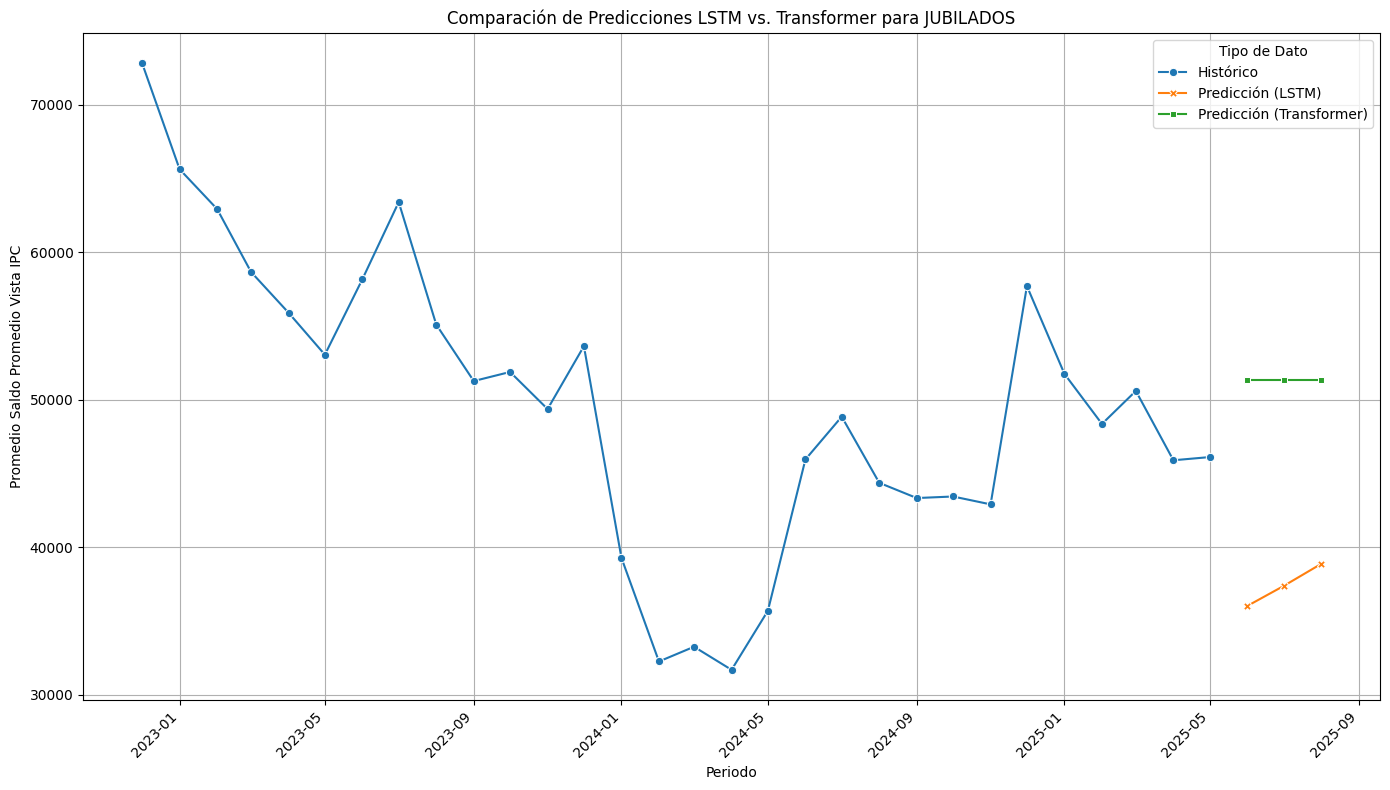

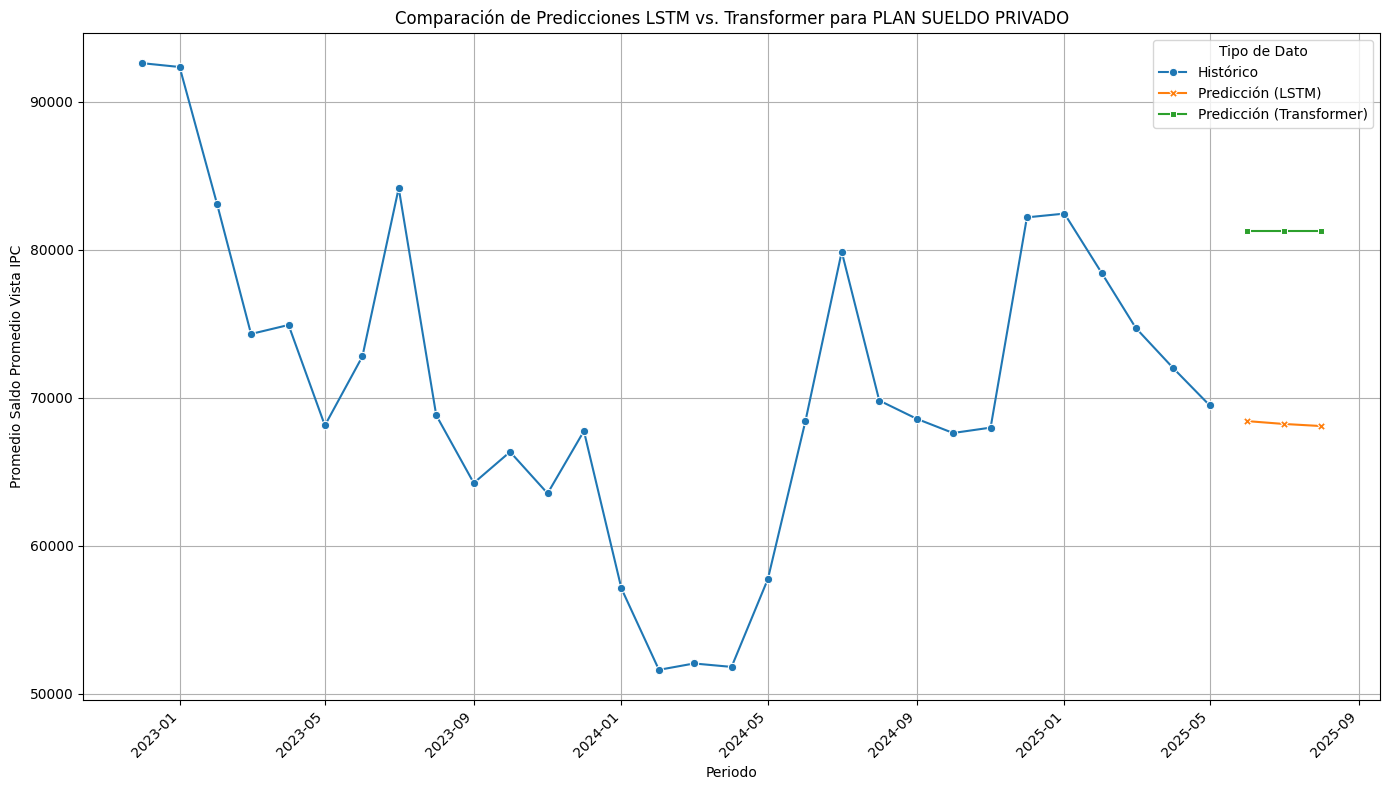

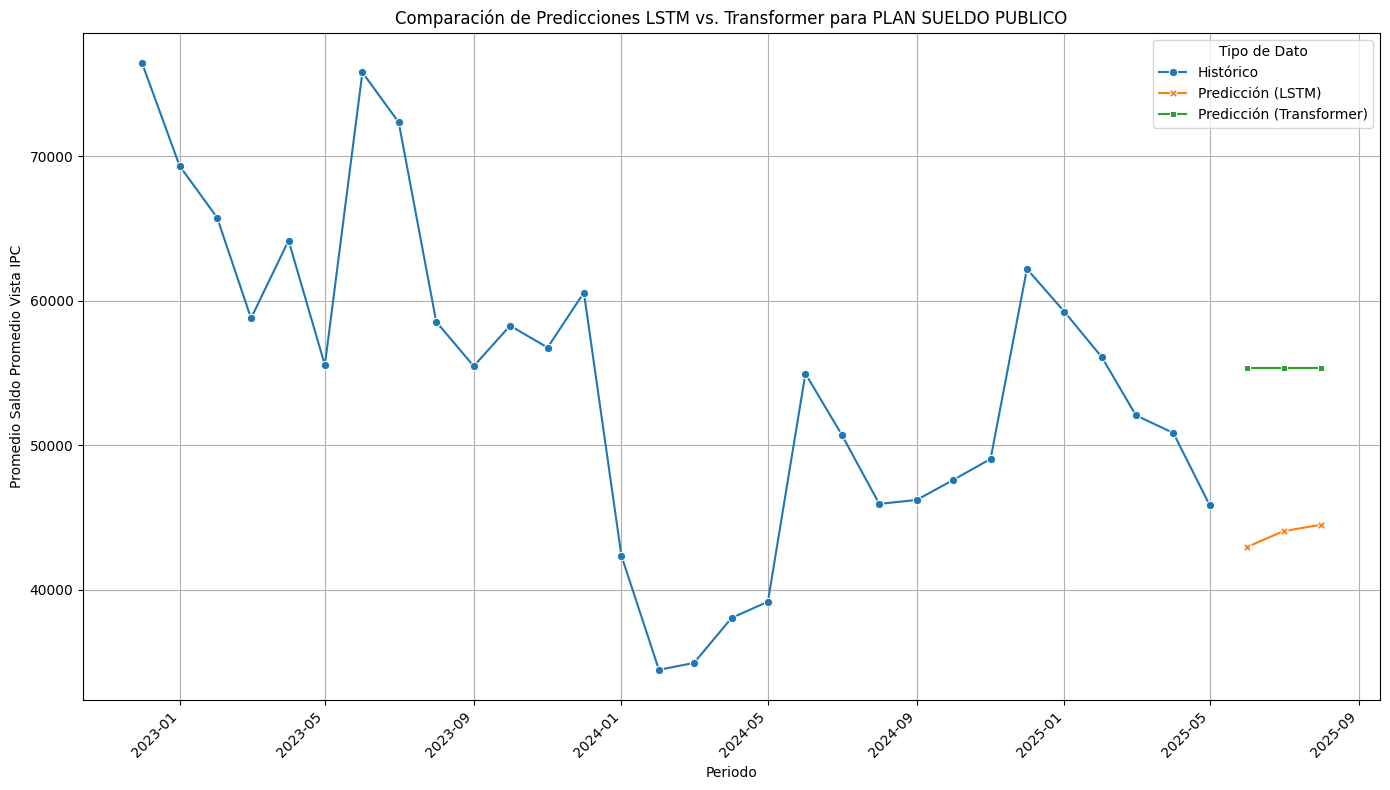

In [47]:
# @title

for segmento in unique_segments:
    plt.figure(figsize=(14, 8))
    segment_data = combined_all_avg_data[combined_all_avg_data['segmento_comercial'] == segmento]
    sns.lineplot(data=segment_data, x='periodo_dt', y='saldo_promedio_vista_ipc', hue='Tipo', style='Tipo', markers=True, dashes=False)
    plt.title(f'Comparación de Predicciones LSTM vs. Transformer para {segmento}')
    plt.xlabel('Periodo')
    plt.ylabel('Promedio Saldo Promedio Vista IPC')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.legend(title='Tipo de Dato')
    plt.tight_layout()
    plt.show()

## Conclusiones de la Comparación de Modelos: LSTM vs. Transformer

Basado en nuestro análisis, aquí se presenta un resumen de los hallazgos y una conclusión sobre la comparación de los modelos:

**Evaluación del Rendimiento de los Modelos:**

*   **Métricas Cuantitativas (MSE y MAE):** Las métricas de evaluación (Error Cuadrático Medio y Error Absoluto Medio) para los modelos LSTM y Transformer son muy bajas y bastante similares en todos los segmentos y quintiles. Esto sugiere que, a un nivel escalado, ambos modelos lograron capturar los patrones en los datos de prueba con un alto grado de precisión. El modelo Transformer muestra una ligera ventaja en algunos casos con tasas de error marginalmente más bajas, pero la diferencia no es sustancial.

*   **Análisis Cualitativo (Gráficos de Predicción):** Los gráficos comparativos revelan una diferencia clave en la naturaleza de las predicciones:
    *   **LSTM:** El modelo LSTM tiende a producir predicciones que muestran más varianza y siguen una tendencia dinámica. En algunos segmentos, predice un ligero aumento o disminución durante el período de pronóstico de tres meses.
    *   **Transformer:** El modelo Transformer, en esta configuración, tiende a generar predicciones más estables, casi planas. Parece capturar el nivel general de la serie temporal pero no proyecta una tendencia fuerte.

**Conclusión y Recomendación:**

Si bien ambos modelos demuestran un rendimiento sólido basado en las métricas de evaluación, el **modelo LSTM parece ser más adecuado para esta tarea de pronóstico específica**. Aquí está el porqué:

*   **Predicciones Más Realistas:** La naturaleza dinámica de las predicciones del LSTM parece más alineada con el comportamiento del mundo real de las series temporales financieras, que rara vez son estáticas.
*   **Captura de Tendencias:** El modelo LSTM parece ser mejor para capturar y extrapolar tendencias a corto plazo, lo cual es una característica valiosa para el pronóstico financiero.
*   **Estabilidad del Transformer:** Las predicciones estables del Transformer, aunque no necesariamente inexactas a corto plazo, podrían ser menos útiles para identificar posibles cambios o tendencias en los datos.

Por lo tanto, para el propósito de pronosticar el `saldo_promedio_vista_ipc`, el **modelo LSTM es la opción recomendada** debido a su capacidad para generar predicciones más matizadas y conscientes de la tendencia. El modelo Transformer, aunque potente, podría requerir un ajuste adicional o una configuración arquitectónica diferente para producir pronósticos más dinámicos en este contexto.